<table align="right" width=100%>
    <tr>
        <td width="20%">
            <img src="hcg-logo.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=6px>
                  <b> CAPSTONE PROJECT DSE </b> 
                </font>
            </div>
            <div align="center">
                <font color="#21618C" size=6px>
                    <b> Home Credit Application Data Wrangling and Pre-Processing  </b>
                </font>
             </div>
        </td>
    </tr>
</table>

## INTRODUCTION TO THE PROBLEM

Home Credit, an international consumer finance provider strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. 

In this notebook, we have so far useed the dataset provided by Home Credit on Kaggle to start with basic exploration of the dataset.

Our goal is to start challenging task to extract new features from additional datasets provided to draw as much conclusion as possible.

<a id="home"></a>
## Table of Content (More to Come...)

1. **[Import Libraries](#lib)**
2. **[Data Understanding & Feature Extraction](#prep)**
    - 2.1 - **[Data Dictionary & Glossary](#read)**
    - 2.2 - **[Loading the Datasets](#load)**
    - 2.3 - **[Glimpse of the data](#preview)**
    - 2.4 - **[Manual Feature Engineering for extracting new features from additional datasets](#research)(Done)**
        - 2.4.1 - **[Using Bureau & Bureau_Balance](#bureau)**
        - 2.4.2 - **[Using Previous_application](#pa)**
        - 2.4.3 - **[Using Credt_card_balance](#cc)**
        - 2.4.4 - **[Using POS_CASH_balance](#pos)**
        - 2.4.5 - **[Using Installments_payments](#is)**
        - 2.4.6 - **[Merging all extracted faetures to main application dataset](#merge)**
     
3. **[Data preparation and Pre-processing](#null)**
    - 3.1 - **[Missing Values Analysis and Treatment](#null)(Done)**
    - 3.2 - ****
4. **[Variable categorization (count of numeric and categorical)](#count)**
5. **[Understanding our TARGET Variable](#target)**

***[Data Exploration and Analysis and Base Model Building] in next notebook***

<a id="lib"></a>
## 1. Import Libraries

In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore') 

#for displaying max columns
pd.pandas.set_option('display.max_columns', None)

In [3]:
#importing libraries for Plotly visualizations

color = sns.color_palette()
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()

import cufflinks as cf
cf.go_offline()

<a id="prep"></a>
# 2. Data Understanding & Pre-Processing

<a id="read"></a>
## 2.1 Understand the Datasets

## Glossary for all available tables :

There are 7 different sources of data. A complete list of each dataset with number of columns can be found below:

1. **application_train|test:** The main testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating 0: the loan was repaid or 1: the loan was not repaid.

2. **bureau:** data concerning client's previous credits from other financial institutions.

3. **bureau_balance:** monthly data about the previous credits in bureau.

4. **previous_application**: previous applications for loans at Home Credit of clients who have loans in the application data. Each previous application has one row and is identified by the feature SK_ID_PREV.

5. **POS_CASH_BALANCE:** monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.

6. **credit_card_balance:** monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
7. **installments_payment:** payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

<img src="home_credit.png">

<a id="load"></a>
## 2.2 Loading all the available datasets

- Link to download the datasets is added here: https://drive.google.com/drive/folders/1L9Z_88KOIA0plmaFuqPeCXP9OASblg5U?usp=sharing

In [2]:
#Loading all datasets

#Primary Dataset
application_data = pd.read_csv('application_train.csv')

In [3]:
#Secondary Datasets
bureau = pd.read_csv('bureau.csv')

previous_application = pd.read_csv('previous_application.csv')

In [4]:
bureau_balance = pd.read_csv('bureau_balance.csv')

In [ ]:
POS_CASH_BALANCE = pd.read_csv('POS_CASH_balance.csv')

In [19]:
credit_card_balance = pd.read_csv('credit_card_balance.csv')

In [2]:
installments_payment = pd.read_csv('installments_payments.csv')

### Complete Dataset Dictionary (Will be further updated as the project progresses)

- Embedded link for Columns info https://docs.google.com/spreadsheets/d/1ZtdhA8JEVW8J14TOYT49yKKNDfRbjfOwDVm7JCl2M4Q/edit#gid=0

In [14]:
complete_dataset_info = pd.DataFrame([application_data.shape, POS_CASH_BALANCE.shape, bureau_balance.shape,bureau.shape, previous_application.shape, installments_payment.shape, credit_card_balance.shape],
            index=['application_data', 'POS_CASH_BALANCE', 'bureau_balance','bureau', 'previous_application', 'installments_payment', 'credit_card_balance'],
            columns=['Rows', 'Columns'])
complete_dataset_info

Rows  Columns
application_data        307511      122
POS_CASH_BALANCE      10001358        8
bureau_balance        27299925        3
bureau                 1716428       17
previous_application   1670214       37
installments_payment  13605401        8
credit_card_balance    3840312       23

In [17]:
def duplicates(df, primary_key):
    return df[primary_key].duplicated().sum()
    

### Finding duplicate entries (if any) in our main datasets:

In [24]:
print("Total number of duplicate entries in application_data dataset: ", duplicates(application_data,'SK_ID_CURR'))
print("Total number of duplicate entries in previous_application dataset: ", duplicates(previous_application,'SK_ID_PREV'))
print("Total number of duplicate entries in bureau dataset: ", duplicates(bureau,'SK_ID_BUREAU'))


Total number of duplicate entries in application_data dataset:  0
Total number of duplicate entries in previous_application dataset:  0
Total number of duplicate entries in bureau dataset:  0


- This looks clean and makes sense. 
- Our Datsets containing demographic or applicant's basic information have zero duplicate entries

In [26]:
print("Total number of duplicate entries in POS_CASH_BALANCE dataset: ", duplicates(POS_CASH_BALANCE,'SK_ID_PREV'))
print("Total number of duplicate entries in installments_payment dataset: ", duplicates(installments_payment,'SK_ID_PREV'))
print("Total number of duplicate entries in credit_card_balance dataset: ", duplicates(credit_card_balance,'SK_ID_PREV'))
print("Total number of duplicate entries in bureau_balance dataset: ", duplicates(bureau_balance,'SK_ID_BUREAU'))


Total number of duplicate entries in POS_CASH_BALANCE dataset:  9065033
Total number of duplicate entries in installments_payment dataset:  12607649
Total number of duplicate entries in credit_card_balance dataset:  3736005
Total number of duplicate entries in bureau_balance dataset:  26482530


**Observation:** 
- We can clearly see such huge number of entries in our payment balances datasets. 
- We cannot say that the above entries are duplicate, its because they are bound to have multiple entries of SK_IDs. 
- The combination for primary key in these tables are a combination of more than one column, hence **no duplicates**. 
- Multiple entries for each row is one month of a credit_card/bureau/Cash/installments balance, and a single account ID can have many rows.

##### Let's see further below the total number of unique entries of our SK_ID_PREV or SK_ID_BUREAU

In [30]:
print("Total number of unique entries of SK_IDs in POS_CASH_BALANCE dataset: ", POS_CASH_BALANCE['SK_ID_PREV'].nunique())
print("Total number of unique entries of SK_IDs in installments_payment dataset: ", installments_payment['SK_ID_PREV'].nunique())
print("Total number of unique entries of SK_IDs in credit_card_balance dataset: ", credit_card_balance['SK_ID_PREV'].nunique())
print("Total number of unique entries of SK_IDs in bureau_balance dataset: ", bureau_balance['SK_ID_BUREAU'].nunique())


Total number of unique entries of SK_IDs in POS_CASH_BALANCE dataset:  936325
Total number of unique entries of SK_IDs in installments_payment dataset:  997752
Total number of unique entries of SK_IDs in credit_card_balance dataset:  104307
Total number of unique entries of SK_IDs in bureau_balance dataset:  817395


*Interesting!*

**Let's find how many approx entries per SK_IDS we have in our payment history datasets**

In [31]:
print("Total number of payment entries corresponding to each SK_IDs in POS_CASH_BALANCE dataset: ", duplicates(POS_CASH_BALANCE,'SK_ID_PREV')/POS_CASH_BALANCE['SK_ID_PREV'].nunique())
print("Total number of payment entries corresponding to each SK_IDs in installments_payment dataset: ", duplicates(installments_payment,'SK_ID_PREV')/installments_payment['SK_ID_PREV'].nunique())
print("Total number of payment entries corresponding to each SK_IDs in credit_card_balance dataset: ",duplicates(credit_card_balance,'SK_ID_PREV')/credit_card_balance['SK_ID_PREV'].nunique())
print("Total number of payment entries corresponding to each SK_IDs in bureau_balance dataset: ",duplicates(bureau_balance,'SK_ID_BUREAU')/ bureau_balance['SK_ID_BUREAU'].nunique())


Total number of payment entries corresponding to each SK_IDs in POS_CASH_BALANCE dataset:  9.68150268336315
Total number of payment entries corresponding to each SK_IDs in installments_payment dataset:  12.636054851305735
Total number of payment entries corresponding to each SK_IDs in credit_card_balance dataset:  35.81739480571774
Total number of payment entries corresponding to each SK_IDs in bureau_balance dataset:  32.39869341016277


- The above result clearly gives a better picture now on our 4 datasets with payment histories. 

- We can see that there are around 9-32 entries of monthly payment / repayment data corresponding to each loan accounts or SK_IDs of an applicant. 

### Final Inferences on our Datasets

**We can broadly classify our datasets in two categories:**

1. **Demography or Individual level information**: At each applicant level, we have naturally **no** duplicate entries of SK_IDs or applicants. 
    - Within this category we have our main application dataset and two historical datasets containing vital information on previous applicants and applicants with loan histories form other institutions as well. 


2. **Payments/Balances Information**: These historical payments or balances tables have payment history corresponding to each loan accounts or SK_IDs of each applicant. In these tables we have multiple entries of SK_IDs because there are multiple payments instances on  loan accounts or credit cards or installments. 

*Now let's begin with having a bird's eye view on our datasets.*

<a id="preview"></a>
## 2.3 Glimpse of all the available datasets

In [32]:
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [12]:
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [15]:
bureau.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

###############################################################################################################################

In [12]:
bureau_balance.head()  #information on payment statuses for various accounts of one person on different months

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

In [24]:
credit_card_balance.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  ...  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                 1700.325  ...          0.000                 0.000   
1                 2250.000  ...      64875.555             64875.555   
2                 2250.000  ...      31460.085             31460.085   
3                11795.760  ...     233048.970            233048.970   
4                22924.890  ...     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  \
0                       1.0                       35.0                Active   
1                       0.0                       69.0                Active   
2                       0.0                       30.0                Active   
3                       0.0                       10.0                Active   
4                       1.0                      101.0                Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0  

[5 rows x 23 columns]

In [67]:
installments_payment.head()

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  \
0           1054186      161674                     1.0   
47438       1054186      161674                     1.0   
138614      1054186      161674                     1.0   
216905      1054186      161674                     1.0   
425089      1054186      161674                     1.0   
577850      1054186      161674                     1.0   
1038640     1054186      161674                     1.0   
1128187     1054186      161674                     1.0   
1402152     1054186      161674                     1.0   
1608829     1054186      161674                     1.0   
1878907     1054186      161674                     1.0   
3612113     1054186      161674                     1.0   

         NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  \
0                            6          -1180.0             -1187.0   
47438                        2          -1300.0             -1307.0   
138614                       8          -1120.0             -1175.0   
216905                      12          -1000.0             -1033.0   
425089                       3          -1270.0             -1275.0   
577850                       1          -1330.0             -1338.0   
1038640                     10          -1060.0             -1125.0   
1128187                      7          -1150.0             -1175.0   
1402152                     11          -1030.0             -1063.0   
1608829                      9          -1090.0             -1154.0   
1878907                      5          -1210.0             -1217.0   
3612113                      4          -1240.0             -1247.0   

         AMT_INSTALMENT  AMT_PAYMENT  
0               6948.36      6948.36  
47438           6948.36      6948.36  
138614          6948.36      6948.36  
216905          6935.22      6935.22  
425089          6948.36      6948.36  
577850          6948.36      6948.36  
1038640         6948.36      6948.36  
1128187         6948.36      6948.36  
1402152         6948.36      6948.36  
1608829         6948.36      6948.36  
1878907         6948.36      6948.36  
3612113         6948.36      6948.36

In [25]:
POS_CASH_BALANCE.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

<a id="research"></a>
## [2.4. Feature Engineering for new columns creation from our additional datasets ----------------(For applicants with credit history)](#home)

<a id="bureau"></a>
## 2.4.1. Taking Bureau & Bureau_Balance datasets first

In [6]:
bureau.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

In [7]:
bureau.select_dtypes('number').shape , bureau.select_dtypes('object').shape

((1716428, 14), (1716428, 3))

- Excluding SK_ID_CURR and SK_ID_BUREAU columns, we have total 12 numerical variables.
- We have total 3 categorical variables in Bureau table

### 2.4.1.1. Starting rows aggregation with simple count of total bureau ID for each applicant

In [8]:
agg = bureau.groupby('SK_ID_CURR')['SK_ID_BUREAU'].agg(['count']).reset_index()

In [9]:
agg.head(2)

SK_ID_CURR  count
0      100001      7
1      100002      8

In [10]:
agg.shape

(305811, 2)

In [ ]:
#agg_new = pd.merge(application_data, agg, on='SK_ID_CURR',how='left')

#agg_new['count'].isnull().sum()

#bureau[bureau['SK_ID_CURR']==100011]['SK_ID_BUREAU'].value_counts()

### 2.4.1.2. Now taking CREDIT_TYPE column and creating simpler classes

In [11]:
bureau['CREDIT_TYPE'].value_counts()

Consumer credit                                 1251615
Credit card                                      402195
Car loan                                          27690
Mortgage                                          18391
Microloan                                         12413
Loan for business development                      1975
Another type of loan                               1017
Unknown type of loan                                555
Loan for working capital replenishment              469
Cash loan (non-earmarked)                            56
Real estate loan                                     27
Loan for the purchase of equipment                   19
Loan for purchase of shares (margin lending)          4
Interbank credit                                      1
Mobile operator loan                                  1
Name: CREDIT_TYPE, dtype: int64

In [13]:
#Fuunction to simplify the types of consumer credit based on the distribution

def credit_type(df):
    if df['CREDIT_TYPE']=='Consumer credit':
        return 'Consumer credit'
    elif df['CREDIT_TYPE']=='Credit card':
        return 'Credit card'
    elif df['CREDIT_TYPE'] =='Car loan':
        return 'Car loan'
    else:
        return 'Others'            

In [14]:
bureau['CREDIT_TYPE'] = bureau.apply(credit_type, axis=1)

In [15]:
bureau['CREDIT_TYPE'].value_counts()

Consumer credit    1251615
Credit card         402195
Others               34928
Car loan             27690
Name: CREDIT_TYPE, dtype: int64

We have now simpler classes in our CREDIT_TYPE column.Let's aggregate this information and save in a new dataframe.

In [16]:
CREDIT_TYPE_status = pd.crosstab(bureau['SK_ID_CURR'], bureau['CREDIT_TYPE']).reset_index()

In [17]:
CREDIT_TYPE_status.head(2)

CREDIT_TYPE  SK_ID_CURR  Car loan  Consumer credit  Credit card  Others
0                100001         0                7            0       0
1                100002         0                4            4       0

In [18]:
#merging the above dataframe with our agg dataframe on SK_ID_CURR

agg_new = pd.merge(agg, CREDIT_TYPE_status, on='SK_ID_CURR')

In [19]:
agg_new.head()

SK_ID_CURR  count  Car loan  Consumer credit  Credit card  Others
0      100001      7         0                7            0       0
1      100002      8         0                4            4       0
2      100003      4         0                2            2       0
3      100004      2         0                2            0       0
4      100005      3         0                2            1       0

### Finding a single column to conclude the information derived from CREDIT_TYPE

- Since, majority class of CREDIT_TYPE is Consumer credit, therefore, finding percent of it.

In [20]:
agg_new['PERCENT_ConsumerCredit_CREDIT_TYPE'] = round((agg_new['Consumer credit']/agg_new['count'])*100,4)

In [21]:
#Dropping classes of credit type to avoid multicorrelation ahead
agg_new = agg_new.drop(['Car loan','Consumer credit', 'Credit card','Others'], axis=1)

In [22]:
agg_new.head()

SK_ID_CURR  count  PERCENT_ConsumerCredit_CREDIT_TYPE
0      100001      7                            100.0000
1      100002      8                             50.0000
2      100003      4                             50.0000
3      100004      2                            100.0000
4      100005      3                             66.6667

### 2.4.1.3 Now taking CREDIT_ACTIVE column and applying same steps

#### Checking distribution of Credit bureau status

In [23]:
bureau['CREDIT_ACTIVE'].value_counts()

Closed      1079273
Active       630607
Sold           6527
Bad debt         21
Name: CREDIT_ACTIVE, dtype: int64

In [24]:
credit_active_status = pd.crosstab(bureau['SK_ID_CURR'], bureau['CREDIT_ACTIVE']).reset_index()

In [25]:
credit_active_status.head()

CREDIT_ACTIVE  SK_ID_CURR  Active  Bad debt  Closed  Sold
0                  100001       3         0       4     0
1                  100002       2         0       6     0
2                  100003       1         0       3     0
3                  100004       0         0       2     0
4                  100005       2         0       1     0

In [26]:
bureau_agg = pd.merge(agg_new, credit_active_status, on='SK_ID_CURR')

In [27]:
bureau_agg['PERCENT_CREDIT_ACTIVE'] = round((bureau_agg['Active']/ bureau_agg['count'])*100,4)

In [28]:
bureau_agg.head()

SK_ID_CURR  count  PERCENT_ConsumerCredit_CREDIT_TYPE  Active  Bad debt  \
0      100001      7                            100.0000       3         0   
1      100002      8                             50.0000       2         0   
2      100003      4                             50.0000       1         0   
3      100004      2                            100.0000       0         0   
4      100005      3                             66.6667       2         0   

   Closed  Sold  PERCENT_CREDIT_ACTIVE  
0       4     0                42.8571  
1       6     0                25.0000  
2       3     0                25.0000  
3       2     0                 0.0000  
4       1     0                66.6667

In [29]:
bureau_agg_cat = bureau_agg.drop(['Active','Bad debt','Closed','Sold'], axis=1)

In [30]:
bureau_agg_cat.head()

SK_ID_CURR  count  PERCENT_ConsumerCredit_CREDIT_TYPE  \
0      100001      7                            100.0000   
1      100002      8                             50.0000   
2      100003      4                             50.0000   
3      100004      2                            100.0000   
4      100005      3                             66.6667   

   PERCENT_CREDIT_ACTIVE  
0                42.8571  
1                25.0000  
2                25.0000  
3                 0.0000  
4                66.6667

### 2.4.1.4 Now taking CREDIT_CURRENCY column

In [31]:
bureau['CREDIT_CURRENCY'].value_counts(normalize=True)

currency 1    0.999180
currency 2    0.000713
currency 3    0.000101
currency 4    0.000006
Name: CREDIT_CURRENCY, dtype: float64

***We can observe that the class one type of currency is dominating the distribution, so it will be redundant to add Currency type in our main dataset.***

### 2.4.1.5 Now taking Numerical columns

### Starting with AMT_CREDIT_SUM & AMT_CREDIT_SUM_DEBT
- **AMT_CREDIT_SUM**	Current credit amount for the Credit Bureau credit	
- **AMT_CREDIT_SUM_DEBT**	Current debt on Credit Bureau credit		


In [5]:
bureau_num_agg = bureau[['SK_ID_CURR', 'AMT_CREDIT_SUM_DEBT']].groupby(by = ['SK_ID_CURR'])['AMT_CREDIT_SUM_DEBT'].sum().reset_index().rename( index = str, columns = { 'AMT_CREDIT_SUM_DEBT': 'TOTAL_CUSTOMER_DEBT'})

In [24]:
bureau_num_agg[bureau_num_agg['TOTAL_CUSTOMER_CREDIT']<0]

Empty DataFrame
Columns: [SK_ID_CURR, TOTAL_CUSTOMER_DEBT, TOTAL_CUSTOMER_CREDIT, DEBT_PERCENT]
Index: []

In [7]:
Total_credit = bureau[['SK_ID_CURR', 'AMT_CREDIT_SUM']].groupby(by = ['SK_ID_CURR'])['AMT_CREDIT_SUM'].sum().reset_index().rename( index = str, columns = { 'AMT_CREDIT_SUM': 'TOTAL_CUSTOMER_CREDIT'})

In [8]:
bureau_num_agg = pd.merge(bureau_num_agg, Total_credit, on='SK_ID_CURR')

In [9]:
bureau_num_agg['DEBT_PERCENT'] = (bureau_num_agg['TOTAL_CUSTOMER_DEBT']/ bureau_num_agg['TOTAL_CUSTOMER_CREDIT'])*100

In [15]:
bureau_num_agg[bureau_num_agg['TOTAL_CUSTOMER_CREDIT']==0].shape, bureau_num_agg.shape

((1276, 4), (305811, 4))

In [16]:
bureau_num_agg['DEBT_PERCENT']== np.inf

0         False
1         False
2         False
3         False
4         False
          ...  
305806    False
305807    False
305808    False
305809    False
305810    False
Name: DEBT_PERCENT, Length: 305811, dtype: bool

In [37]:
bureau_num_agg.head()

SK_ID_CURR  TOTAL_CUSTOMER_DEBT  TOTAL_CUSTOMER_CREDIT  DEBT_PERCENT
0      100001             596686.5            1453365.000     41.055516
1      100002             245781.0             865055.565     28.412163
2      100003                  0.0            1017400.500      0.000000
3      100004                  0.0             189037.800      0.000000
4      100005             568408.5             657126.000     86.499165

### 2.4.1.6 Now taking AMT_CREDIT_SUM_DEBT & AMT_CREDIT_SUM_OVERDUE

- **AMT_CREDIT_SUM_DEBT**	Current debt on Credit Bureau credit		
- **AMT_CREDIT_SUM_OVERDUE**	Current amount overdue on Credit Bureau credit	

In [38]:
#We already have TOTAL_CUSTOMER_DEBT, now we can find total AMT_CREDIT_SUM_OVERDUE and generate a ratio with TOTAL_CUSTOMER_DEBT

Total_credit_sum_overdue = bureau[['SK_ID_CURR', 'AMT_CREDIT_SUM_OVERDUE']].groupby(by = ['SK_ID_CURR'])['AMT_CREDIT_SUM_OVERDUE'].sum().reset_index().rename( index = str, columns = { 'AMT_CREDIT_SUM_OVERDUE': 'TOTAL_CUSTOMER_OVERDUE'})

In [39]:
Total_credit_sum_overdue.head(2)

SK_ID_CURR  TOTAL_CUSTOMER_OVERDUE
0      100001                     0.0
1      100002                     0.0

In [40]:
bureau_num_agg = pd.merge(bureau_num_agg, Total_credit_sum_overdue, on='SK_ID_CURR')

In [41]:
bureau_num_agg['OVERDUE_DEBT_PERCENT'] = (bureau_num_agg['TOTAL_CUSTOMER_OVERDUE']/ bureau_num_agg['TOTAL_CUSTOMER_DEBT'])*100

In [42]:
bureau_num_agg.head(2)

SK_ID_CURR  TOTAL_CUSTOMER_DEBT  TOTAL_CUSTOMER_CREDIT  DEBT_PERCENT  \
0      100001             596686.5            1453365.000     41.055516   
1      100002             245781.0             865055.565     28.412163   

   TOTAL_CUSTOMER_OVERDUE  OVERDUE_DEBT_PERCENT  
0                     0.0                   0.0  
1                     0.0                   0.0

### 2.4.1.7. Now taking DAYS_CREDIT and finding average days difference between subsequent bureau applications

- **DAYS_CREDIT**	How many days before current application did client apply for Credit Bureau credit	time only relative to the application

In [43]:
grp = bureau[['SK_ID_CURR', 'SK_ID_BUREAU', 'DAYS_CREDIT']].groupby(by = ['SK_ID_CURR'])

In [45]:
grp1 = grp.apply(lambda x: x.sort_values(['DAYS_CREDIT'], ascending = False)).reset_index(drop = True)#rename(index = str, columns = {'DAYS_CREDIT': 'DAYS_CREDIT_DIFF'})

In [46]:
grp1.head()

SK_ID_CURR  SK_ID_BUREAU  DAYS_CREDIT
0      100001       5896635          -49
1      100001       5896636         -320
2      100001       5896634         -559
3      100001       5896630         -857
4      100001       5896632         -879

In [47]:
grp1['DAYS_CREDIT'] = grp1['DAYS_CREDIT']*-1

In [48]:
grp1['DAYS_DIFF'] = grp1.groupby(by = ['SK_ID_CURR'])['DAYS_CREDIT'].diff()

In [49]:
grp1['DAYS_DIFF'] = grp1['DAYS_DIFF'].fillna(0).astype('uint32')

In [50]:
days_diff_agg = grp1[['SK_ID_CURR', 'DAYS_DIFF']].groupby(by = ['SK_ID_CURR'])['DAYS_DIFF'].agg('mean').reset_index()

In [51]:
days_diff_agg.rename( columns = {'DAYS_DIFF': 'AVG_DAYS_DIFF'}, inplace=True)

In [52]:
days_diff_agg.head()

SK_ID_CURR  AVG_DAYS_DIFF
0      100001     217.571429
1      100002     166.750000
2      100003     495.000000
3      100004     459.000000
4      100005     103.666667

In [53]:
std_days_diff = grp1[['SK_ID_CURR', 'DAYS_DIFF']].groupby(by = ['SK_ID_CURR'])['DAYS_DIFF'].std().reset_index()

In [54]:
days_diff_agg = pd.merge(days_diff_agg,std_days_diff, on='SK_ID_CURR') 

In [55]:
days_diff_agg.rename( columns = {'DAYS_DIFF': 'STD_DAYS_DIFF'}, inplace=True)

In [56]:
days_diff_agg.head()

SK_ID_CURR  AVG_DAYS_DIFF  STD_DAYS_DIFF
0      100001     217.571429     234.150135
1      100002     166.750000     171.672238
2      100003     495.000000     480.375548
3      100004     459.000000     649.124025
4      100005     103.666667     120.583305

In [57]:
#Now merging this table with our bureau_num_agg table

bureau_num_agg = pd.merge(bureau_num_agg, days_diff_agg, on='SK_ID_CURR')

In [58]:
bureau_num_agg.head()

SK_ID_CURR  TOTAL_CUSTOMER_DEBT  TOTAL_CUSTOMER_CREDIT  DEBT_PERCENT  \
0      100001             596686.5            1453365.000     41.055516   
1      100002             245781.0             865055.565     28.412163   
2      100003                  0.0            1017400.500      0.000000   
3      100004                  0.0             189037.800      0.000000   
4      100005             568408.5             657126.000     86.499165   

   TOTAL_CUSTOMER_OVERDUE  OVERDUE_DEBT_PERCENT  AVG_DAYS_DIFF  STD_DAYS_DIFF  
0                     0.0                   0.0     217.571429     234.150135  
1                     0.0                   0.0     166.750000     171.672238  
2                     0.0                   NaN     495.000000     480.375548  
3                     0.0                   NaN     459.000000     649.124025  
4                     0.0                   0.0     103.666667     120.583305

***Let's check correlation in our numerical aggregated columns***

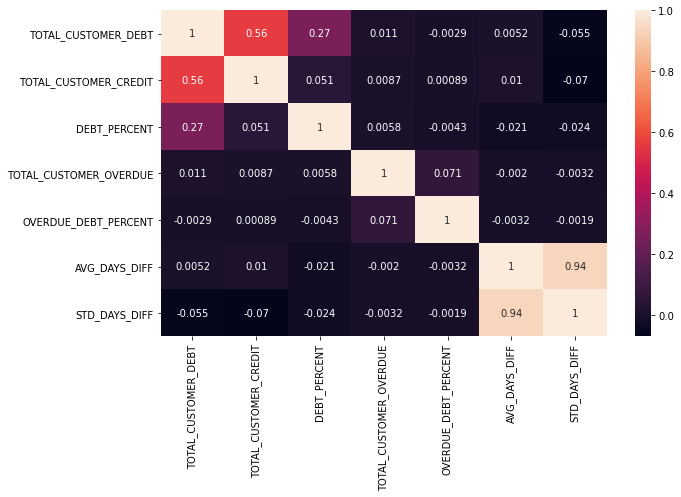

In [59]:
plt.figure(figsize=(10,6))
sns.heatmap(bureau_num_agg.iloc[:,1:].corr(), annot=True)
plt.show()

- We can see **TOTAL_CUSTOMER_DEBT** is highly correlated with TOTAL_CUSTOMER_CREDIT and DEBT_PERCENT. 
- Also, **STD_DAYS_DIFF** is highly correlated with AVG_DAYS_DIFF and is adding little or no information with null values as well.
- So, to avoid multicollinearity, we can straigh away remove TOTAL_CUSTOMER_DEBT & STD_DAYS_DIFF column.

In [60]:
bureau_num_agg.drop('TOTAL_CUSTOMER_DEBT', axis=1, inplace=True)

In [61]:
bureau_num_agg.drop('STD_DAYS_DIFF', axis=1, inplace=True)

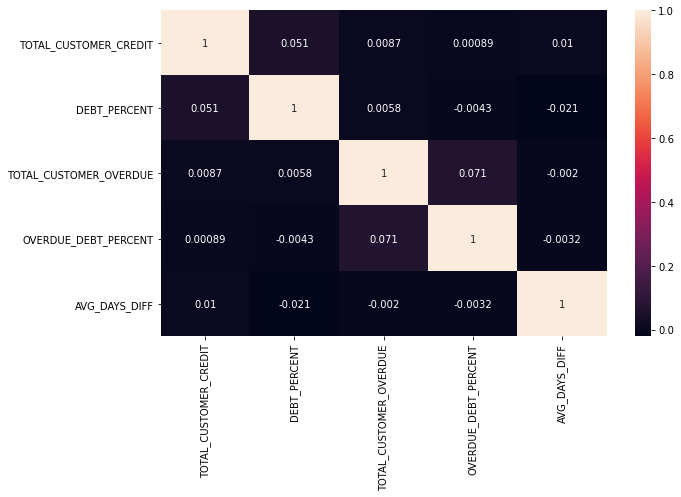

In [62]:
plt.figure(figsize=(10,6))
sns.heatmap(bureau_num_agg.iloc[:,1:].corr(), annot=True)
plt.show()

We can see after removing TOTAL_CUSTOMER_DEBT & STD_DAYS_DIFF, correlation is almost zero among our features.

### 2.4.1.8. Now merging both categorical and numerical columns aggregation:

In [63]:
#categoroical columns result
bureau_agg_cat.head()

SK_ID_CURR  count  PERCENT_ConsumerCredit_CREDIT_TYPE  \
0      100001      7                            100.0000   
1      100002      8                             50.0000   
2      100003      4                             50.0000   
3      100004      2                            100.0000   
4      100005      3                             66.6667   

   PERCENT_CREDIT_ACTIVE  
0                42.8571  
1                25.0000  
2                25.0000  
3                 0.0000  
4                66.6667

In [64]:
#nemerical columns result
bureau_num_agg.head()

SK_ID_CURR  TOTAL_CUSTOMER_CREDIT  DEBT_PERCENT  TOTAL_CUSTOMER_OVERDUE  \
0      100001            1453365.000     41.055516                     0.0   
1      100002             865055.565     28.412163                     0.0   
2      100003            1017400.500      0.000000                     0.0   
3      100004             189037.800      0.000000                     0.0   
4      100005             657126.000     86.499165                     0.0   

   OVERDUE_DEBT_PERCENT  AVG_DAYS_DIFF  
0                   0.0     217.571429  
1                   0.0     166.750000  
2                   NaN     495.000000  
3                   NaN     459.000000  
4                   0.0     103.666667

In [65]:
#shape of both results

bureau_agg_cat.shape, bureau_num_agg.shape

((305811, 4), (305811, 6))

In [66]:
bureau_agg_final = pd.merge(bureau_agg_cat, bureau_num_agg, on='SK_ID_CURR')

In [67]:
bureau_agg_final.rename(columns={'count': 'TOTAL_BUREAU_ACCOUNTS'}, inplace=True)

In [68]:
bureau_agg_final.head()

SK_ID_CURR  TOTAL_BUREAU_ACCOUNTS  PERCENT_ConsumerCredit_CREDIT_TYPE  \
0      100001                      7                            100.0000   
1      100002                      8                             50.0000   
2      100003                      4                             50.0000   
3      100004                      2                            100.0000   
4      100005                      3                             66.6667   

   PERCENT_CREDIT_ACTIVE  TOTAL_CUSTOMER_CREDIT  DEBT_PERCENT  \
0                42.8571            1453365.000     41.055516   
1                25.0000             865055.565     28.412163   
2                25.0000            1017400.500      0.000000   
3                 0.0000             189037.800      0.000000   
4                66.6667             657126.000     86.499165   

   TOTAL_CUSTOMER_OVERDUE  OVERDUE_DEBT_PERCENT  AVG_DAYS_DIFF  
0                     0.0                   0.0     217.571429  
1                     0.0                   0.0     166.750000  
2                     0.0                   NaN     495.000000  
3                     0.0                   NaN     459.000000  
4                     0.0                   0.0     103.666667

### [B. Taking  bureau_balance table now](#research)

In [69]:
bureau_balance.head()

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

### 2.4.1.9. Aggregating information form MONTHS_BALANCE column

In [70]:
bureau_balance_agg_months = bureau_balance[['SK_ID_BUREAU', 'MONTHS_BALANCE']].groupby('SK_ID_BUREAU').min().reset_index()

In [71]:
bureau_balance_agg_months.head()

SK_ID_BUREAU  MONTHS_BALANCE
0       5001709             -96
1       5001710             -82
2       5001711              -3
3       5001712             -18
4       5001713             -21

In [72]:
bureau_balance_agg_months.shape

(817395, 2)

In [73]:
bureau_balance_agg_months['ACCOUNT_AGE(in months)'] = bureau_balance_agg_months['MONTHS_BALANCE']*-1 +1 

In [74]:
bureau_balance_agg_months.head()

SK_ID_BUREAU  MONTHS_BALANCE  ACCOUNT_AGE(in months)
0       5001709             -96                      97
1       5001710             -82                      83
2       5001711              -3                       4
3       5001712             -18                      19
4       5001713             -21                      22

In [75]:
bureau_balance_agg_months = bureau_balance_agg_months.drop('MONTHS_BALANCE', axis=1)

### 2.4.1.10. Now aggregating information from STATUS column

In [76]:
bureau_balance_agg = pd.crosstab(bureau_balance['SK_ID_BUREAU'], bureau_balance['STATUS']).reset_index()

In [77]:
bureau_balance_agg.head()

STATUS  SK_ID_BUREAU   0  1  2  3  4  5   C   X
0            5001709   0  0  0  0  0  0  86  11
1            5001710   5  0  0  0  0  0  48  30
2            5001711   3  0  0  0  0  0   0   1
3            5001712  10  0  0  0  0  0   9   0
4            5001713   0  0  0  0  0  0   0  22

In [78]:
bureau_balance_agg.iloc[:,1:7].T.sum().head()

0     0
1     5
2     3
3    10
4     0
dtype: int64

In [79]:
bureau_balance_agg['PERCENT_ON_TIME_PAYMENT_BUREAU'] = round((bureau_balance_agg['0']/bureau_balance_agg.iloc[:,1:7].T.sum())*100,4) 

In [80]:
bureau_balance_agg.shape

(817395, 10)

In [81]:
bureau_balance_agg.isnull().sum()

STATUS
SK_ID_BUREAU                           0
0                                      0
1                                      0
2                                      0
3                                      0
4                                      0
5                                      0
C                                      0
X                                      0
PERCENT_ON_TIME_PAYMENT_BUREAU    130368
dtype: int64

**We can see we do not have any payment record for 130368 records in bureau data, so we can straight away drop them**

In [82]:
#dropping null values which will add no information

bureau_balance_agg  = bureau_balance_agg.dropna()

In [83]:
bureau_balance_agg.isnull().sum()

STATUS
SK_ID_BUREAU                      0
0                                 0
1                                 0
2                                 0
3                                 0
4                                 0
5                                 0
C                                 0
X                                 0
PERCENT_ON_TIME_PAYMENT_BUREAU    0
dtype: int64

No null values anymore.

In [84]:
#Ensuring no duplicates
bureau_balance_agg['SK_ID_BUREAU'].duplicated().sum()

0

In [85]:
#final shape of aggregated columns
bureau_balance_agg.shape

(687027, 10)

### 2.4.1.11. Merging both Months and Status information

In [86]:
bureau_balance_agg_final = pd.merge(bureau_balance_agg_months, bureau_balance_agg, on='SK_ID_BUREAU')

In [87]:
bureau_balance_agg_final.head()

SK_ID_BUREAU  ACCOUNT_AGE(in months)   0  1  2  3  4  5   C   X  \
0       5001710                      83   5  0  0  0  0  0  48  30   
1       5001711                       4   3  0  0  0  0  0   0   1   
2       5001712                      19  10  0  0  0  0  0   9   0   
3       5001716                      86  27  0  0  0  0  0  39  20   
4       5001717                      22  17  0  0  0  0  0   5   0   

   PERCENT_ON_TIME_PAYMENT_BUREAU  
0                           100.0  
1                           100.0  
2                           100.0  
3                           100.0  
4                           100.0

In [88]:
#adding column for percent months, the account has been in Status C

bureau_balance_agg_final['PERCENT_DURATION_STATUS_CLOSED'] = round((bureau_balance_agg_final['C']/bureau_balance_agg_final['ACCOUNT_AGE(in months)'])*100,4)

In [89]:
bureau_balance_agg_final.head()

SK_ID_BUREAU  ACCOUNT_AGE(in months)   0  1  2  3  4  5   C   X  \
0       5001710                      83   5  0  0  0  0  0  48  30   
1       5001711                       4   3  0  0  0  0  0   0   1   
2       5001712                      19  10  0  0  0  0  0   9   0   
3       5001716                      86  27  0  0  0  0  0  39  20   
4       5001717                      22  17  0  0  0  0  0   5   0   

   PERCENT_ON_TIME_PAYMENT_BUREAU  PERCENT_DURATION_STATUS_CLOSED  
0                           100.0                         57.8313  
1                           100.0                          0.0000  
2                           100.0                         47.3684  
3                           100.0                         45.3488  
4                           100.0                         22.7273

In [90]:
# Now deleting all the status columns.
bureau_balance_agg_final.drop(['0','1', '2', '3', '4', '5', 'C', 'X'], axis=1, inplace=True)

In [91]:
bureau_balance_agg_final.head()

SK_ID_BUREAU  ACCOUNT_AGE(in months)  PERCENT_ON_TIME_PAYMENT_BUREAU  \
0       5001710                      83                           100.0   
1       5001711                       4                           100.0   
2       5001712                      19                           100.0   
3       5001716                      86                           100.0   
4       5001717                      22                           100.0   

   PERCENT_DURATION_STATUS_CLOSED  
0                         57.8313  
1                          0.0000  
2                         47.3684  
3                         45.3488  
4                         22.7273

In [92]:
#bureau_new_inner = pd.merge(bureau, bureau_balance_agg_final, on='SK_ID_BUREAU', how='inner')

#bureau_new_inner.shape, bureau.shape, bureau_balance.shape

bureau_new_left =  pd.merge(bureau, bureau_balance_agg_final, on='SK_ID_BUREAU', how='left')

In [93]:
bureau_new_left.shape

(1716428, 20)

In [94]:
avg_account_age = bureau_new_left[['SK_ID_CURR','ACCOUNT_AGE(in months)']].groupby('SK_ID_CURR')['ACCOUNT_AGE(in months)'].mean().reset_index()

In [95]:
avg_account_age.head()

SK_ID_CURR  ACCOUNT_AGE(in months)
0      100001               24.571429
1      100002               29.250000
2      100003                     NaN
3      100004                     NaN
4      100005                7.000000

In [96]:
avg_account_age.shape

(305811, 2)

In [97]:
avg_account_age['ACCOUNT_AGE(in months)'].isnull().sum()

175038

In [98]:
bureau_new_left[bureau_new_left['SK_ID_CURR']==100004]['ACCOUNT_AGE(in months)']

363104   NaN
363105   NaN
Name: ACCOUNT_AGE(in months), dtype: float64

In [99]:
avg_ON_TIME_PAYMENT = bureau_new_left[['SK_ID_CURR', 'PERCENT_ON_TIME_PAYMENT_BUREAU']].groupby('SK_ID_CURR')['PERCENT_ON_TIME_PAYMENT_BUREAU'].mean().reset_index()

In [100]:
avg_ON_TIME_PAYMENT.head()

SK_ID_CURR  PERCENT_ON_TIME_PAYMENT_BUREAU
0      100001                        98.90110
1      100002                        65.81935
2      100003                             NaN
3      100004                             NaN
4      100005                       100.00000

In [101]:
avg_PERCENT_DURATION_STATUS_CLOSED = bureau_new_left[['SK_ID_CURR','PERCENT_DURATION_STATUS_CLOSED']].groupby('SK_ID_CURR')['PERCENT_DURATION_STATUS_CLOSED'].mean().reset_index()

In [102]:
avg_PERCENT_DURATION_STATUS_CLOSED.head() 

SK_ID_CURR  PERCENT_DURATION_STATUS_CLOSED
0      100001                       44.124043
1      100002                       13.457012
2      100003                             NaN
3      100004                             NaN
4      100005                       12.820500

In [103]:
avg_PERCENT_DURATION_STATUS_CLOSED.shape, avg_account_age.shape, avg_ON_TIME_PAYMENT.shape

((305811, 2), (305811, 2), (305811, 2))

### 2.4.1.12. Finally merging all the aggregated information from burea_balance on our bureau aggregated columns

- avg_account_age
- avg_PERCENT_DURATION_STATUS_CLOSED 
- avg_ON_TIME_PAYMENT

In [104]:
bureau_agg_final.head()

SK_ID_CURR  TOTAL_BUREAU_ACCOUNTS  PERCENT_ConsumerCredit_CREDIT_TYPE  \
0      100001                      7                            100.0000   
1      100002                      8                             50.0000   
2      100003                      4                             50.0000   
3      100004                      2                            100.0000   
4      100005                      3                             66.6667   

   PERCENT_CREDIT_ACTIVE  TOTAL_CUSTOMER_CREDIT  DEBT_PERCENT  \
0                42.8571            1453365.000     41.055516   
1                25.0000             865055.565     28.412163   
2                25.0000            1017400.500      0.000000   
3                 0.0000             189037.800      0.000000   
4                66.6667             657126.000     86.499165   

   TOTAL_CUSTOMER_OVERDUE  OVERDUE_DEBT_PERCENT  AVG_DAYS_DIFF  
0                     0.0                   0.0     217.571429  
1                     0.0                   0.0     166.750000  
2                     0.0                   NaN     495.000000  
3                     0.0                   NaN     459.000000  
4                     0.0                   0.0     103.666667

In [105]:
bureau_agg_final.shape

(305811, 9)

**Merging avg_account_age**

In [106]:
bureau_agg_complete = pd.merge(bureau_agg_final, avg_account_age, on='SK_ID_CURR')

In [107]:
bureau_agg_complete.shape

(305811, 10)

**Now avg_PERCENT_DURATION_STATUS_CLOSED**

In [108]:
bureau_agg_complete = pd.merge(bureau_agg_complete, avg_PERCENT_DURATION_STATUS_CLOSED, on='SK_ID_CURR')

In [109]:
bureau_agg_complete.shape

(305811, 11)

**Now avg_ON_TIME_PAYMENT**

In [110]:
bureau_agg_complete = pd.merge(bureau_agg_complete, avg_ON_TIME_PAYMENT, on='SK_ID_CURR') 

### Final shape and look of information derived from Feature Engineering of  Bureau and Bureau_balance datasets:

In [111]:
bureau_agg_complete.shape

(305811, 12)

In [112]:
bureau_agg_complete.head()

SK_ID_CURR  TOTAL_BUREAU_ACCOUNTS  PERCENT_ConsumerCredit_CREDIT_TYPE  \
0      100001                      7                            100.0000   
1      100002                      8                             50.0000   
2      100003                      4                             50.0000   
3      100004                      2                            100.0000   
4      100005                      3                             66.6667   

   PERCENT_CREDIT_ACTIVE  TOTAL_CUSTOMER_CREDIT  DEBT_PERCENT  \
0                42.8571            1453365.000     41.055516   
1                25.0000             865055.565     28.412163   
2                25.0000            1017400.500      0.000000   
3                 0.0000             189037.800      0.000000   
4                66.6667             657126.000     86.499165   

   TOTAL_CUSTOMER_OVERDUE  OVERDUE_DEBT_PERCENT  AVG_DAYS_DIFF  \
0                     0.0                   0.0     217.571429   
1                     0.0                   0.0     166.750000   
2                     0.0                   NaN     495.000000   
3                     0.0                   NaN     459.000000   
4                     0.0                   0.0     103.666667   

   ACCOUNT_AGE(in months)  PERCENT_DURATION_STATUS_CLOSED  \
0               24.571429                       44.124043   
1               29.250000                       13.457012   
2                     NaN                             NaN   
3                     NaN                             NaN   
4                7.000000                       12.820500   

   PERCENT_ON_TIME_PAYMENT_BUREAU  
0                        98.90110  
1                        65.81935  
2                             NaN  
3                             NaN  
4                       100.00000

In [113]:
bureau_agg_complete.isnull().sum()

SK_ID_CURR                                 0
TOTAL_BUREAU_ACCOUNTS                      0
PERCENT_ConsumerCredit_CREDIT_TYPE         0
PERCENT_CREDIT_ACTIVE                      0
TOTAL_CUSTOMER_CREDIT                      0
DEBT_PERCENT                            1211
TOTAL_CUSTOMER_OVERDUE                     0
OVERDUE_DEBT_PERCENT                   88702
AVG_DAYS_DIFF                              0
ACCOUNT_AGE(in months)                175038
PERCENT_DURATION_STATUS_CLOSED        175038
PERCENT_ON_TIME_PAYMENT_BUREAU        175038
dtype: int64

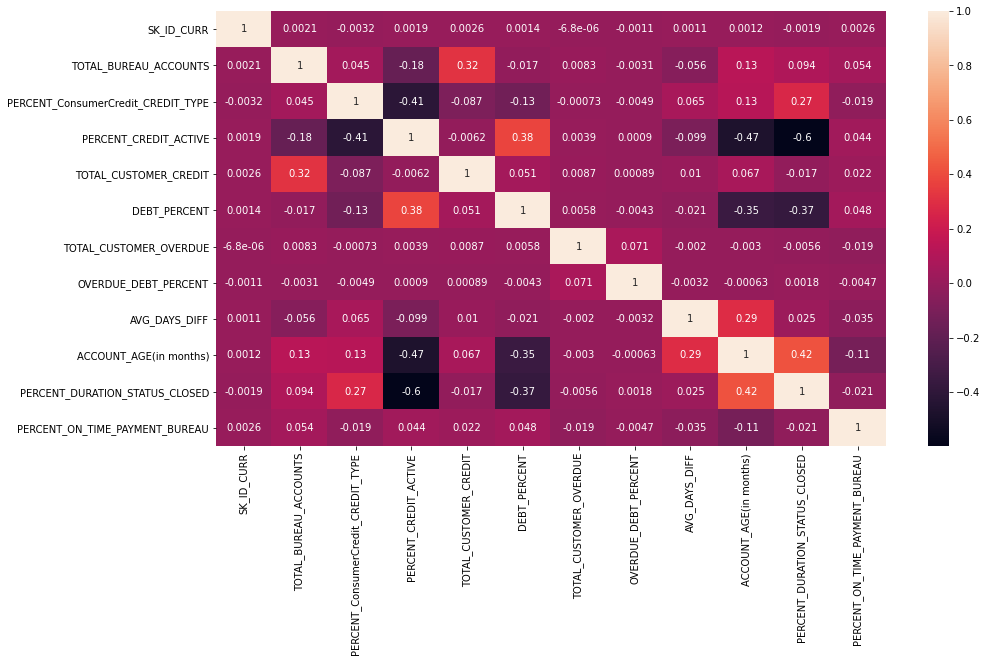

In [114]:
plt.figure(figsize=(15,8))
sns.heatmap(bureau_agg_complete.corr(), annot=True)
plt.show()

***Exported the aggregated information to a new csv file for quicker access of information***

In [ ]:
bureau_agg_complete.to_csv('bureau_agg_complete.csv', index=False)

<a id="pa"></a>
## [2.4.2 Previous_application Manoeuvring](#home)

In [3]:
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [4]:
previous_application.shape

(1670214, 37)

In [13]:
previous_application_copy = previous_application

In [18]:
previous_application = previous_application_copy

***We have 35 columns in previous application to use and extract features for our main dataset.*** 

In [8]:
print("Total unique previous applications: ", len(previous_application['SK_ID_PREV'].unique()))

print("Total unique applicants from main application dataset: ",len(previous_application['SK_ID_CURR'].unique()))

Total unique previous applications:  1670214
Total unique applicants from main application dataset:  338857


So, we have previous application records of 338857 loan applicants.  

Let's move ahead and start analysis of all columns in order to judge whether or not to use a particular column for creating new features.

### removing columns with more than 50% null values

In [19]:
# replacing identified garbage value of 365243 in few columns. 
previous_application.replace(to_replace=365243, value=np.NaN, inplace=True)

In [20]:
prev_app_missing = missing_values_table(previous_application)

In [21]:
prev_app_missing[prev_app_missing['Percent']>50]

Total    Percent
RATE_INTEREST_PRIVILEGED  1664263  99.643698
RATE_INTEREST_PRIMARY     1664263  99.643698
DAYS_FIRST_DRAWING        1607509  96.245691
DAYS_TERMINATION           898978  53.824121
AMT_DOWN_PAYMENT           895844  53.636480
RATE_DOWN_PAYMENT          895844  53.636480
DAYS_LAST_DUE              884286  52.944473

In [22]:
index_missing_values = prev_app_missing[prev_app_missing['Percent']>50].index

In [23]:
#dropping RATE_INTEREST_PRIVILEGED and RATE_INTEREST_PRIMARY 

previous_application = previous_application.drop(index_missing_values, axis=1)

In [24]:
previous_application.shape

(1670214, 30)

Let's work on 28 (excluding keys) columns now

### 2.4.2.2 Dividing the dataset into categorical and numerical part

In [25]:
pre_num=previous_application.select_dtypes('number')

pre_num.shape

(1670214, 14)

In [27]:
pre_cat=previous_application.select_dtypes('object')

pre_cat.shape

(1670214, 16)

### 2.4.2.3. Starting with all the numerical type columns

In [28]:
pre_num.head(5)

SK_ID_PREV  SK_ID_CURR  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  \
0     2030495    271877.0     1730.430          17145.0     17145.0   
1     2802425    108129.0    25188.615         607500.0    679671.0   
2     2523466    122040.0    15060.735         112500.0    136444.5   
3     2819243    176158.0    47041.335         450000.0    470790.0   
4     1784265    202054.0    31924.395         337500.0    404055.0   

   AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  \
0          17145.0                       15                       1   
1         607500.0                       11                       1   
2         112500.0                       11                       1   
3         450000.0                        7                       1   
4         337500.0                        9                       1   

   DAYS_DECISION  SELLERPLACE_AREA  CNT_PAYMENT  DAYS_FIRST_DUE  \
0            -73                35         12.0           -42.0   
1           -164                -1         36.0          -134.0   
2           -301                -1         12.0          -271.0   
3           -512                -1         12.0          -482.0   
4           -781                -1         24.0             NaN   

   DAYS_LAST_DUE_1ST_VERSION  NFLAG_INSURED_ON_APPROVAL  
0                      300.0                        0.0  
1                      916.0                        1.0  
2                       59.0                        1.0  
3                     -152.0                        1.0  
4                        NaN                        NaN

#### finding total previous applications per SK_ID_CURR

In [29]:
total_prev_app = pre_num.groupby('SK_ID_CURR')['SK_ID_PREV'].agg(['count']).reset_index().rename(columns={'count':'TOTAL_PREV_APP'})

In [30]:
total_prev_app.head(2)

SK_ID_CURR  TOTAL_PREV_APP
0    100001.0               1
1    100002.0               1

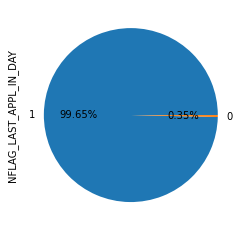

In [31]:
pre_num['NFLAG_LAST_APPL_IN_DAY'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.show()

#### 'NFLAG_LAST_APPL_IN_DAY' column is highly imbalance therefore we can remove the column.

In [32]:
pre_num = pre_num.drop(['NFLAG_LAST_APPL_IN_DAY'],axis=1)

In [34]:
pre_num['SELLERPLACE_AREA'].value_counts()

-1       762675
 0        60523
 50       37401
 30       34423
 20       33840
          ...  
 826          1
 959          1
 6624         1
 1217         1
 1023         1
Name: SELLERPLACE_AREA, Length: 2097, dtype: int64

In [35]:
## dropping 'HOUR_APPR_PROCESS_START' and 'SELLERPLACE_AREA' columns
pre_num=pre_num.drop(['HOUR_APPR_PROCESS_START','SELLERPLACE_AREA'],axis=1)

In [37]:
avg_days_decision = pre_num.groupby('SK_ID_CURR')['DAYS_DECISION'].agg(['mean']).reset_index().rename(columns={'mean':'AVG_DAYS_DECISION_prev'})

In [38]:
prev_app_agg = pd.merge(total_prev_app,avg_days_decision, on='SK_ID_CURR')

In [39]:
 .head(2)

SK_ID_CURR  TOTAL_PREV_APP  AVG_DAYS_DECISION_prev
0    100001.0               1                 -1740.0
1    100002.0               1                  -606.0

### Taking NFLAG_INSURED_ON_APPROVAL

- Did the client requested insurance during the previous application (1 = yes, 0 = no)

In [40]:
pre_num['NFLAG_INSURED_ON_APPROVAL'].value_counts()

0.0    665527
1.0    331622
Name: NFLAG_INSURED_ON_APPROVAL, dtype: int64

In [41]:
pre_num['NFLAG_INSURED_ON_APPROVAL'].isnull().sum()/pre_num['NFLAG_INSURED_ON_APPROVAL'].shape[0]*100

40.29812946125467

In [50]:
num = pd.crosstab(previous_application['SK_ID_CURR'],previous_application['NFLAG_INSURED_ON_APPROVAL']).reset_index().rename(columns={0.0:'NO', 1.0: 'YES'})

In [51]:
num.head(2)

NFLAG_INSURED_ON_APPROVAL  SK_ID_CURR  NO  YES
0                            100001.0   1    0
1                            100002.0   1    0

In [52]:
num['PERCENT_AVAILED_INSURANCE']=round((num['YES']/num.iloc[:,1:3].T.sum())*100,2)

num.head()

NFLAG_INSURED_ON_APPROVAL  SK_ID_CURR  NO  YES  PERCENT_AVAILED_INSURANCE
0                            100001.0   1    0                       0.00
1                            100002.0   1    0                       0.00
2                            100003.0   1    2                      66.67
3                            100004.0   1    0                       0.00
4                            100005.0   1    0                       0.00

In [53]:
num=num.drop(['NO','YES'],axis=1)

num.head(2)

NFLAG_INSURED_ON_APPROVAL  SK_ID_CURR  PERCENT_AVAILED_INSURANCE
0                            100001.0                        0.0
1                            100002.0                        0.0

In [54]:
prev_app_agg = prev_app_agg.merge(num, on='SK_ID_CURR')
prev_app_agg.head(2)

SK_ID_CURR  TOTAL_PREV_APP  AVG_DAYS_DECISION_prev  \
0    100001.0               1                 -1740.0   
1    100002.0               1                  -606.0   

   PERCENT_AVAILED_INSURANCE  
0                        0.0  
1                        0.0

### 2.4.2.4 'AMT_ANNUITY'

In [57]:
avg_AMT_ANNUITY = round(previous_application.groupby('SK_ID_CURR')['AMT_ANNUITY'].agg(['mean']),2).reset_index().rename(columns={'mean': 'AVG_AMT_ANNUITY'})

In [61]:
std_AMT_ANNUITY = round(previous_application.groupby('SK_ID_CURR')['AMT_ANNUITY'].agg(['std']),2).reset_index().rename(columns={'std': 'STD_AMT_ANNUITY'})

In [ ]:
prev_app_agg = prev_app_agg.merge(avg_AMT_ANNUITY , on = 'SK_ID_CURR')

In [62]:
prev_app_agg = prev_app_agg.merge(std_AMT_ANNUITY , on = 'SK_ID_CURR')

In [63]:
prev_app_agg.head(2)

SK_ID_CURR  TOTAL_PREV_APP  AVG_DAYS_DECISION_prev  \
0    100001.0               1                 -1740.0   
1    100002.0               1                  -606.0   

   PERCENT_AVAILED_INSURANCE  AVG_AMT_ANNUITY  STD_AMT_ANNUITY  
0                        0.0          3951.00              NaN  
1                        0.0          9251.78              NaN

### 2.4.2.5  'AMT_APPLICATION'

In [64]:
avg_AMT_APPLICATION = round(previous_application.groupby('SK_ID_CURR')['AMT_APPLICATION'].agg(['mean']),2).reset_index().rename(columns={'mean': 'AVG_AMT_APPLICATION'})

std_AMT_APPLICATION = round(previous_application.groupby('SK_ID_CURR')['AMT_APPLICATION'].agg(['std']),2).reset_index().rename(columns={'std': 'STD_AMT_APPLICATION'})

In [65]:
prev_app_agg = prev_app_agg.merge(avg_AMT_APPLICATION , on = 'SK_ID_CURR')

In [66]:
prev_app_agg = prev_app_agg.merge(std_AMT_APPLICATION , on = 'SK_ID_CURR')

In [67]:
prev_app_agg.head(2)

SK_ID_CURR  TOTAL_PREV_APP  AVG_DAYS_DECISION_prev  \
0    100001.0               1                 -1740.0   
1    100002.0               1                  -606.0   

   PERCENT_AVAILED_INSURANCE  AVG_AMT_ANNUITY  STD_AMT_ANNUITY  \
0                        0.0          3951.00              NaN   
1                        0.0          9251.78              NaN   

   AVG_AMT_APPLICATION  STD_AMT_APPLICATION  
0              24835.5                  NaN  
1             179055.0                  NaN

### 2.4.2.6 'AMT_CREDIT'

In [68]:
avg_AMT_CREDIT = round(previous_application.groupby('SK_ID_CURR')['AMT_CREDIT'].agg(['mean']),2).reset_index().rename(columns={'mean': 'AVG_AMT_CREDIT'})

std_AMT_CREDIT = round(previous_application.groupby('SK_ID_CURR')['AMT_CREDIT'].agg(['std']),2).reset_index().rename(columns={'std': 'STD_AMT_CREDIT'})

In [69]:
prev_app_agg = prev_app_agg.merge(avg_AMT_CREDIT , on = 'SK_ID_CURR')

In [70]:
prev_app_agg = prev_app_agg.merge(std_AMT_CREDIT , on = 'SK_ID_CURR')

In [71]:
prev_app_agg.head(2)

SK_ID_CURR  TOTAL_PREV_APP  AVG_DAYS_DECISION_prev  \
0    100001.0               1                 -1740.0   
1    100002.0               1                  -606.0   

   PERCENT_AVAILED_INSURANCE  AVG_AMT_ANNUITY  STD_AMT_ANNUITY  \
0                        0.0          3951.00              NaN   
1                        0.0          9251.78              NaN   

   AVG_AMT_APPLICATION  STD_AMT_APPLICATION  AVG_AMT_CREDIT  STD_AMT_CREDIT  
0              24835.5                  NaN         23787.0             NaN  
1             179055.0                  NaN        179055.0             NaN

### 2.4.2.7  AMT_GOODS_PRICE

In [72]:
avg_AMT_GOODS_PRICE = round(previous_application.groupby('SK_ID_CURR')['AMT_GOODS_PRICE'].agg(['mean']),2).reset_index().rename(columns={'mean': 'AVG_AMT_GOODS_PRICE'})

std_AMT_GOODS_PRICE = round(previous_application.groupby('SK_ID_CURR')['AMT_GOODS_PRICE'].agg(['std']),2).reset_index().rename(columns={'std': 'STD_AMT_GOODS_PRICE'})

In [73]:
prev_app_agg = prev_app_agg.merge(avg_AMT_GOODS_PRICE , on = 'SK_ID_CURR')

In [74]:
prev_app_agg = prev_app_agg.merge(std_AMT_GOODS_PRICE , on = 'SK_ID_CURR')

In [75]:
prev_app_agg.head(2)

SK_ID_CURR  TOTAL_PREV_APP  AVG_DAYS_DECISION_prev  \
0    100001.0               1                 -1740.0   
1    100002.0               1                  -606.0   

   PERCENT_AVAILED_INSURANCE  AVG_AMT_ANNUITY  STD_AMT_ANNUITY  \
0                        0.0          3951.00              NaN   
1                        0.0          9251.78              NaN   

   AVG_AMT_APPLICATION  STD_AMT_APPLICATION  AVG_AMT_CREDIT  STD_AMT_CREDIT  \
0              24835.5                  NaN         23787.0             NaN   
1             179055.0                  NaN        179055.0             NaN   

   AVG_AMT_GOODS_PRICE  STD_AMT_GOODS_PRICE  
0              24835.5                  NaN  
1             179055.0                  NaN

### 2.4.2.8  'CNT_PAYMENT'

In [76]:
avg_CNT_PAYMENT = round(previous_application.groupby('SK_ID_CURR')['CNT_PAYMENT'].agg(['mean']),2).reset_index().rename(columns={'mean': 'AVG_CNT_PAYMENT'})

std_CNT_PAYMENT = round(previous_application.groupby('SK_ID_CURR')['CNT_PAYMENT'].agg(['std']),2).reset_index().rename(columns={'std': 'STD_CNT_PAYMENT'})

In [77]:
prev_app_agg = prev_app_agg.merge(avg_CNT_PAYMENT , on = 'SK_ID_CURR')

In [78]:
prev_app_agg = prev_app_agg.merge(std_CNT_PAYMENT , on = 'SK_ID_CURR')

In [79]:
prev_app_agg.head(2)

SK_ID_CURR  TOTAL_PREV_APP  AVG_DAYS_DECISION_prev  \
0    100001.0               1                 -1740.0   
1    100002.0               1                  -606.0   

   PERCENT_AVAILED_INSURANCE  AVG_AMT_ANNUITY  STD_AMT_ANNUITY  \
0                        0.0          3951.00              NaN   
1                        0.0          9251.78              NaN   

   AVG_AMT_APPLICATION  STD_AMT_APPLICATION  AVG_AMT_CREDIT  STD_AMT_CREDIT  \
0              24835.5                  NaN         23787.0             NaN   
1             179055.0                  NaN        179055.0             NaN   

   AVG_AMT_GOODS_PRICE  STD_AMT_GOODS_PRICE  AVG_CNT_PAYMENT  STD_CNT_PAYMENT  
0              24835.5                  NaN              8.0              NaN  
1             179055.0                  NaN             24.0              NaN

In [80]:
## Shape of extracted dataset from numerical variables
prev_app_agg.shape

(337339, 14)

### Using amnd Analysing categorical variables

In [81]:
pre_cat.head()

NAME_CONTRACT_TYPE WEEKDAY_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0     Consumer loans                   SATURDAY                           Y   
1         Cash loans                   THURSDAY                           Y   
2         Cash loans                    TUESDAY                           Y   
3         Cash loans                     MONDAY                           Y   
4         Cash loans                   THURSDAY                           Y   

  NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS      NAME_PAYMENT_TYPE  \
0                    XAP             Approved  Cash through the bank   
1                    XNA             Approved                    XNA   
2                    XNA             Approved  Cash through the bank   
3                    XNA             Approved  Cash through the bank   
4                Repairs              Refused  Cash through the bank   

  CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY  \
0                XAP              NaN         Repeater              Mobile   
1                XAP    Unaccompanied         Repeater                 XNA   
2                XAP  Spouse, partner         Repeater                 XNA   
3                XAP              NaN         Repeater                 XNA   
4                 HC              NaN         Repeater                 XNA   

  NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  \
0            POS               XNA             Country-wide   
1           Cash            x-sell           Contact center   
2           Cash            x-sell  Credit and cash offices   
3           Cash            x-sell  Credit and cash offices   
4           Cash           walk-in  Credit and cash offices   

  NAME_SELLER_INDUSTRY NAME_YIELD_GROUP       PRODUCT_COMBINATION  
0         Connectivity           middle  POS mobile with interest  
1                  XNA       low_action          Cash X-Sell: low  
2                  XNA             high         Cash X-Sell: high  
3                  XNA           middle       Cash X-Sell: middle  
4                  XNA             high         Cash Street: high

In [85]:
### 4.1 NAME_CONTRACT_TYPE

pre_cat['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

In [84]:
previous_application = previous_application.replace('XNA', value=np.NaN)

In [86]:
previous_application['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
Name: NAME_CONTRACT_TYPE, dtype: int64

In [88]:
NAME_CONTRACT_TYPE_agg = pd.crosstab(previous_application['SK_ID_CURR'],previous_application['NAME_CONTRACT_TYPE']).reset_index()

In [89]:
## We can consider this column

NAME_CONTRACT_TYPE_agg.head(2)

NAME_CONTRACT_TYPE  SK_ID_CURR  Cash loans  Consumer loans  Revolving loans
0                     100001.0           0               1                0
1                     100002.0           0               1                0

In [90]:
dict={'Cash loans':'prev_Cash_loans','Consumer loans':'prev_Consumer_loans','Revolving loans':'prev_Revolving_loans'}

NAME_CONTRACT_TYPE_agg = NAME_CONTRACT_TYPE_agg.rename(columns=dict)

NAME_CONTRACT_TYPE_agg.head(2)

NAME_CONTRACT_TYPE  SK_ID_CURR  prev_Cash_loans  prev_Consumer_loans  \
0                     100001.0                0                    1   
1                     100002.0                0                    1   

NAME_CONTRACT_TYPE  prev_Revolving_loans  
0                                      0  
1                                      0

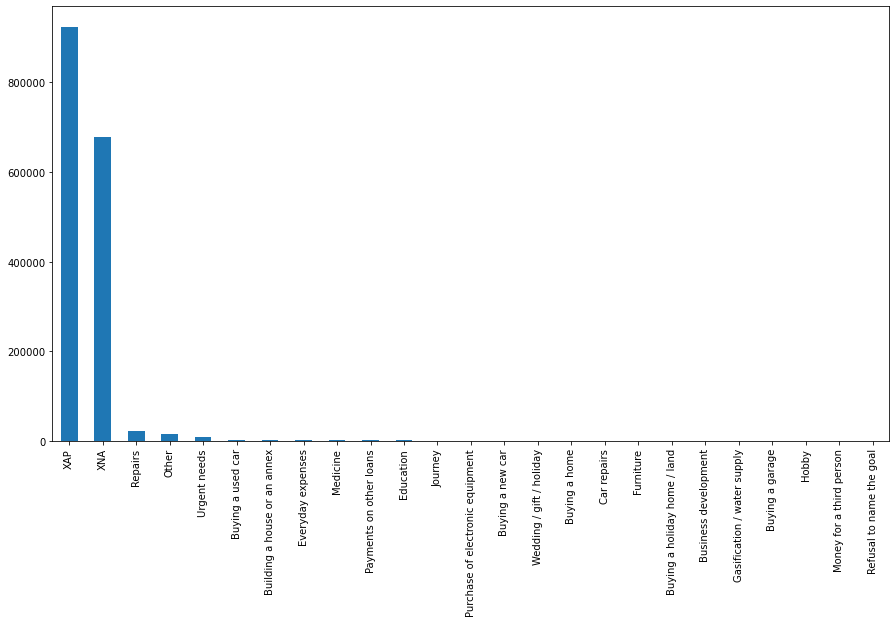

In [91]:
### 4.2 NAME_CASH_LOAN_PURPOSE

plt.figure(figsize=(15,8))

pre_cat['NAME_CASH_LOAN_PURPOSE'].value_counts().plot(kind='bar')
plt.show()

### Most of the values are unkonown so we can drop this column

In [92]:
pre_cat=pre_cat.drop(['NAME_CASH_LOAN_PURPOSE'],axis=1)

In [93]:
### 4.3 NAME_CONTRACT_STATUS

pre_cat['NAME_CONTRACT_STATUS'].value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

In [94]:
## we can consider this column

NAME_CONTRACT_STATUS_agg = pd.crosstab(previous_application['SK_ID_CURR'],previous_application['NAME_CONTRACT_STATUS']).reset_index()

In [95]:
dict={'Approved':'prev_status_Approved','Canceled':'prev_status_Canceled','Refused':'prev_status_Refused','Unused offer':'prev_status_Unused'}
NAME_CONTRACT_STATUS_agg = NAME_CONTRACT_STATUS_agg.rename(columns=dict)

In [96]:
NAME_CONTRACT_STATUS_agg.head(2)

NAME_CONTRACT_STATUS  SK_ID_CURR  prev_status_Approved  prev_status_Canceled  \
0                       100001.0                     1                     0   
1                       100002.0                     1                     0   

NAME_CONTRACT_STATUS  prev_status_Refused  prev_status_Unused  
0                                       0                   0  
1                                       0                   0

In [97]:
## Merging the dataframes

cat_agg = pd.merge(NAME_CONTRACT_TYPE_agg,NAME_CONTRACT_STATUS_agg, on='SK_ID_CURR')

cat_agg.head(2)

SK_ID_CURR  prev_Cash_loans  prev_Consumer_loans  prev_Revolving_loans  \
0    100001.0                0                    1                     0   
1    100002.0                0                    1                     0   

   prev_status_Approved  prev_status_Canceled  prev_status_Refused  \
0                     1                     0                    0   
1                     1                     0                    0   

   prev_status_Unused  
0                   0  
1                   0

In [98]:
### 4.7 NAME_TYPE_SUITE

pre_cat['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      508970
Family             213263
Spouse, partner     67069
Children            31566
Other_B             17624
Other_A              9077
Group of people      2240
Name: NAME_TYPE_SUITE, dtype: int64

In [99]:
def sut(d):
    if d=='Other_B' or d=='Other_A' or d=='Group of people':
        return ('Others')
    elif d=='Spouse, partner' or d=='Children':
        return 'Family'
    else:
        return d

In [100]:
previous_application['NAME_TYPE_SUITE']=previous_application['NAME_TYPE_SUITE'].apply(sut)

In [101]:
previous_application['NAME_TYPE_SUITE'].value_counts()

Unaccompanied    508970
Family           311898
Others            28941
Name: NAME_TYPE_SUITE, dtype: int64

In [102]:
# Merging the dataframe

NAME_TYPE_SUITE_agg = pd.crosstab(previous_application['SK_ID_CURR'],previous_application['NAME_TYPE_SUITE']).reset_index()

In [103]:
dict={'Unaccompanied':'prev_Unaccompanied','Family':'prev_Family','Others':'prev_Others'}

NAME_TYPE_SUITE_agg = NAME_TYPE_SUITE_agg.rename(columns=dict)

In [104]:
cat_agg=cat_agg.merge(NAME_TYPE_SUITE_agg, on='SK_ID_CURR')

cat_agg.head(2)

SK_ID_CURR  prev_Cash_loans  prev_Consumer_loans  prev_Revolving_loans  \
0    100001.0                0                    1                     0   
1    100003.0                1                    2                     0   

   prev_status_Approved  prev_status_Canceled  prev_status_Refused  \
0                     1                     0                    0   
1                     3                     0                    0   

   prev_status_Unused  prev_Family  prev_Others  prev_Unaccompanied  
0                   0            1            0                   0  
1                   0            2            0                   1

In [106]:
### 4.8 NAME_CLIENT_TYPE

previous_application['NAME_CLIENT_TYPE'].value_counts()

Repeater     1231261
New           301363
Refreshed     135649
Name: NAME_CLIENT_TYPE, dtype: int64

In [107]:
## Merging the dataframe

NAME_CLIENT_TYPE_agg = pd.crosstab(previous_application['SK_ID_CURR'],previous_application['NAME_CLIENT_TYPE']).reset_index()

In [108]:
dict={'Repeater':'CLIENT_TYPE_Repeater','New':'CLIENT_TYPE_New','Refreshed':'CLIENT_TYPE_Refreshed'}

NAME_CLIENT_TYPE_agg = NAME_CLIENT_TYPE_agg.rename(columns=dict)

In [109]:
cat_agg=cat_agg.merge(NAME_CLIENT_TYPE_agg,on='SK_ID_CURR')

cat_agg.head(2)

SK_ID_CURR  prev_Cash_loans  prev_Consumer_loans  prev_Revolving_loans  \
0    100001.0                0                    1                     0   
1    100003.0                1                    2                     0   

   prev_status_Approved  prev_status_Canceled  prev_status_Refused  \
0                     1                     0                    0   
1                     3                     0                    0   

   prev_status_Unused  prev_Family  prev_Others  prev_Unaccompanied  \
0                   0            1            0                   0   
1                   0            2            0                   1   

   CLIENT_TYPE_New  CLIENT_TYPE_Refreshed  CLIENT_TYPE_Repeater  
0                0                      1                     0  
1                0                      2                     1

In [112]:
### 4.9 NAME_GOODS_CATEGORY

pre_cat['NAME_GOODS_CATEGORY'].value_counts()

XNA                         950809
Mobile                      224708
Consumer Electronics        121576
Computers                   105769
Audio/Video                  99441
Furniture                    53656
Photo / Cinema Equipment     25021
Construction Materials       24995
Clothing and Accessories     23554
Auto Accessories              7381
Jewelry                       6290
Homewares                     5023
Medical Supplies              3843
Vehicles                      3370
Sport and Leisure             2981
Gardening                     2668
Other                         2554
Office Appliances             2333
Tourism                       1659
Medicine                      1550
Direct Sales                   446
Fitness                        209
Additional Service             128
Education                      107
Weapon                          77
Insurance                       64
House Construction               1
Animals                          1
Name: NAME_GOODS_CAT

Seems to be a redundant information with majoirty as XNAs

### 4.10 NAME_PORTFOLIO

In [114]:
previous_application['NAME_PORTFOLIO'].value_counts()

POS      691011
Cash     461563
Cards    144985
Cars        425
Name: NAME_PORTFOLIO, dtype: int64

In [115]:
## Merging the dataframe

NAME_PORTFOLIO_agg = pd.crosstab(previous_application['SK_ID_CURR'],previous_application['NAME_PORTFOLIO']).reset_index()

In [116]:
dict={'POS':'prev_POS','Cash':'prev_Cash','Cards':'prev_Cards','Cars':'prev_Cars'}

NAME_PORTFOLIO_agg = NAME_PORTFOLIO_agg.rename(columns=dict)

In [121]:
cat_agg = cat_agg.merge(NAME_PORTFOLIO_agg , on= 'SK_ID_CURR')

cat_agg.head(5)

SK_ID_CURR  prev_Cash_loans  prev_Consumer_loans  prev_Revolving_loans  \
0    100001.0                0                    1                     0   
1    100003.0                1                    2                     0   
2    100004.0                0                    1                     0   
3    100006.0                5                    2                     2   
4    100007.0                4                    2                     0   

   prev_status_Approved  prev_status_Canceled  prev_status_Refused  \
0                     1                     0                    0   
1                     3                     0                    0   
2                     1                     0                    0   
3                     5                     3                    1   
4                     6                     0                    0   

   prev_status_Unused  prev_Family  prev_Others  prev_Unaccompanied  \
0                   0            1            0                   0   
1                   0            2            0                   1   
2                   0            0            0                   1   
3                   0            1            0                   3   
4                   0            2            0                   2   

   CLIENT_TYPE_New  CLIENT_TYPE_Refreshed  CLIENT_TYPE_Repeater  prev_Cards  \
0                0                      1                     0           0   
1                0                      2                     1           0   
2                1                      0                     0           0   
3                1                      0                     8           1   
4                1                      0                     5           0   

   prev_Cars  prev_Cash  prev_POS  
0          0          0         1  
1          0          1         2  
2          0          0         1  
3          0          3         2  
4          0          4         2

### 4.11 NAME_PRODUCT_TYPE

In [122]:
pre_cat['NAME_PRODUCT_TYPE'].value_counts()

XNA        1063666
x-sell      456287
walk-in     150261
Name: NAME_PRODUCT_TYPE, dtype: int64

In [123]:
## We can drop this column
pre_cat=pre_cat.drop(['NAME_PRODUCT_TYPE'],axis=1)
pre_cat.shape

(1670214, 14)

In [124]:
### 4.12 CHANNEL_TYPE

pre_cat['CHANNEL_TYPE'].value_counts()

## we can drop this column

Credit and cash offices       719968
Country-wide                  494690
Stone                         212083
Regional / Local              108528
Contact center                 71297
AP+ (Cash loan)                57046
Channel of corporate sales      6150
Car dealer                       452
Name: CHANNEL_TYPE, dtype: int64

In [125]:
pre_cat=pre_cat.drop(['CHANNEL_TYPE'],axis=1)

pre_cat.shape

(1670214, 13)

### 4.14 NAME_YIELD_GROUP

In [127]:
previous_application['NAME_YIELD_GROUP'].value_counts()

middle        385532
high          353331
low_normal    322095
low_action     92041
Name: NAME_YIELD_GROUP, dtype: int64

In [128]:
def yie(df):
    if df=='low_normal' or df=='low_action':
        return ('low')
    else:
        return df

In [129]:
previous_application['NAME_YIELD_GROUP']=previous_application['NAME_YIELD_GROUP'].apply(yie)

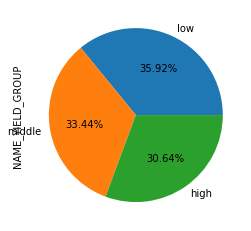

In [130]:
previous_application['NAME_YIELD_GROUP'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.show()

In [131]:
## Merging the dataframe

NAME_YIELD_GROUP_agg = pd.crosstab(previous_application['SK_ID_CURR'],previous_application['NAME_YIELD_GROUP']).reset_index()

In [132]:
dict={'low':'YIELD_GROUP_low','middle':'YIELD_GROUP_middle','XNA':'YIELD_GROUP_XNA','high':'YIELD_GROUP_high'}
NAME_YIELD_GROUP_agg = NAME_YIELD_GROUP_agg.rename(columns=dict)

In [133]:
cat_agg=cat_agg.merge(NAME_YIELD_GROUP_agg, on='SK_ID_CURR')

cat_agg.head(2)

SK_ID_CURR  prev_Cash_loans  prev_Consumer_loans  prev_Revolving_loans  \
0    100001.0                0                    1                     0   
1    100003.0                1                    2                     0   

   prev_status_Approved  prev_status_Canceled  prev_status_Refused  \
0                     1                     0                    0   
1                     3                     0                    0   

   prev_status_Unused  prev_Family  prev_Others  prev_Unaccompanied  \
0                   0            1            0                   0   
1                   0            2            0                   1   

   CLIENT_TYPE_New  CLIENT_TYPE_Refreshed  CLIENT_TYPE_Repeater  prev_Cards  \
0                0                      1                     0           0   
1                0                      2                     1           0   

   prev_Cars  prev_Cash  prev_POS  YIELD_GROUP_high  YIELD_GROUP_low  \
0          0          0         1                 1                0   
1          0          1         2                 0                1   

   YIELD_GROUP_middle  
0                   0  
1                   2

***Final shape of categorical columns extractions***

In [134]:
cat_agg.shape

(286259, 21)

In [135]:
# 5. Merging all the numerical and categorical columns

prev_app_agg.shape

(337339, 14)

In [136]:
prev_app_agg = prev_app_agg.merge(cat_agg, on='SK_ID_CURR', how='left')

In [137]:
prev_app_agg.head()

SK_ID_CURR  TOTAL_PREV_APP  AVG_DAYS_DECISION_prev  \
0    100001.0               1                 -1740.0   
1    100002.0               1                  -606.0   
2    100003.0               3                 -1305.0   
3    100004.0               1                  -815.0   
4    100005.0               2                  -536.0   

   PERCENT_AVAILED_INSURANCE  AVG_AMT_ANNUITY  STD_AMT_ANNUITY  \
0                       0.00          3951.00              NaN   
1                       0.00          9251.78              NaN   
2                      66.67         56553.99         46332.56   
3                       0.00          5357.25              NaN   
4                       0.00          4813.20              NaN   

   AVG_AMT_APPLICATION  STD_AMT_APPLICATION  AVG_AMT_CREDIT  STD_AMT_CREDIT  \
0             24835.50                  NaN        23787.00             NaN   
1            179055.00                  NaN       179055.00             NaN   
2            435436.50            424161.62       484191.00       497949.86   
3             24282.00                  NaN        20106.00             NaN   
4             22308.75             31549.34        20076.75        28392.81   

   AVG_AMT_GOODS_PRICE  STD_AMT_GOODS_PRICE  AVG_CNT_PAYMENT  STD_CNT_PAYMENT  \
0              24835.5                  NaN              8.0              NaN   
1             179055.0                  NaN             24.0              NaN   
2             435436.5            424161.62             10.0             3.46   
3              24282.0                  NaN              4.0              NaN   
4              44617.5                  NaN             12.0              NaN   

   prev_Cash_loans  prev_Consumer_loans  prev_Revolving_loans  \
0              0.0                  1.0                   0.0   
1              NaN                  NaN                   NaN   
2              1.0                  2.0                   0.0   
3              0.0                  1.0                   0.0   
4              NaN                  NaN                   NaN   

   prev_status_Approved  prev_status_Canceled  prev_status_Refused  \
0                   1.0                   0.0                  0.0   
1                   NaN                   NaN                  NaN   
2                   3.0                   0.0                  0.0   
3                   1.0                   0.0                  0.0   
4                   NaN                   NaN                  NaN   

   prev_status_Unused  prev_Family  prev_Others  prev_Unaccompanied  \
0                 0.0          1.0          0.0                 0.0   
1                 NaN          NaN          NaN                 NaN   
2                 0.0          2.0          0.0                 1.0   
3                 0.0          0.0          0.0                 1.0   
4                 NaN          NaN          NaN                 NaN   

   CLIENT_TYPE_New  CLIENT_TYPE_Refreshed  CLIENT_TYPE_Repeater  prev_Cards  \
0              0.0                    1.0                   0.0         0.0   
1              NaN                    NaN                   NaN         NaN   
2              0.0                    2.0                   1.0         0.0   
3              1.0                    0.0                   0.0         0.0   
4              NaN                    NaN                   NaN         NaN   

   prev_Cars  prev_Cash  prev_POS  YIELD_GROUP_high  YIELD_GROUP_low  \
0        0.0        0.0       1.0               1.0              0.0   
1        NaN        NaN       NaN               NaN              NaN   
2        0.0        1.0       2.0               0.0              1.0   
3        0.0        0.0       1.0               0.0              0.0   
4        NaN        NaN       NaN               NaN              NaN   

   YIELD_GROUP_middle  
0                 0.0  
1                 NaN  
2                 2.0  
3                 1.0  
4                 NaN

In [145]:
prev_app_agg.to_csv('prev_app_agg.csv')

<a id="cc"></a>

## [2.4.3. Credit_Card_Balance dataset ](#home)

**Salient features of this dataset:**

- Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.
- This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.

In [120]:
#credit_card_balance[credit_card_balance['SK_ID_CURR']==100023].sort_values(['MONTHS_BALANCE'])

#credit_card_balance.sort_values(['SK_ID_CURR','MONTHS_BALANCE']).head(5)

credit_card_balance.shape

(3840312, 23)

In [121]:
credit_card_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

### 2.4.3.1 Taking SK_DPD column first

In [122]:
credit_card_balance['SK_DPD'].value_counts()

0       3686957
1         90369
8          2772
32         2340
7          1797
         ...   
1501          1
2647          1
1520          1
2649          1
2831          1
Name: SK_DPD, Length: 917, dtype: int64

We can see there are a lot of dicrete values for Days past dues column. Let's follow the same approach we used for bureau table.

#### The above days we can  ranges from 0 to more than 1000 days. To use it in a meaningful way, we will have to create bins of days.

In [20]:
#Creating a function to generate bins for the above discrete values for days past dues.

def DPD(df):
    if df['SK_DPD']==0:
        return 'ON_TIME'
    elif df['SK_DPD'] > 0 and df['SK_DPD'] < 30:
        return 'DPD(0-30)'
    else:
        return 'DPD(30+)'            

In [21]:
credit_card_balance['DPD_status'] = credit_card_balance.apply(DPD, axis=1)

In [22]:
credit_card_balance['DPD_status'].value_counts()

ON_TIME      3686957
DPD(0-30)      98335
DPD(30+)       55020
Name: DPD_status, dtype: int64

***We can see much simpler bins of DPD(days past due) are created***

Now applying groupby on the newly created column and let's see the result.

In [23]:
DPD_stats_agg = pd.crosstab(credit_card_balance['SK_ID_CURR'], credit_card_balance['DPD_status']).reset_index()
DPD_stats_agg.head()

DPD_status  SK_ID_CURR  DPD(0-30)  DPD(30+)  ON_TIME
0               100006          0         0        6
1               100011          0         0       74
2               100013          1         0       95
3               100021          0         0       17
4               100023          0         0        8

***Now checking how many credit_cards are there per each applicant***

In [24]:
agg_CC = credit_card_balance[['SK_ID_CURR','SK_ID_PREV']].groupby('SK_ID_CURR').nunique().reset_index()

In [25]:
print("Customers with more than two credit card: ",agg_CC[agg_CC['SK_ID_PREV']>1].shape[0])
print("Customers with one credit card each: ",agg_CC.shape[0])

Customers with more than two credit card:  740
Customers with one credit card each:  103558


We can observe above that **only 740 customers have more than one credit card** out of total around 100k customers. Which is significantly quite less as compared to majority group with just one credit card.
- So we can drop the idea of adding a column for number of credit cards per customer.

### 2.4.3.2. Let's add total count of credit card's month, which will reflect age of the credit card account.

In [26]:
agg = credit_card_balance[['SK_ID_CURR','SK_ID_PREV']].groupby('SK_ID_CURR').count().reset_index()
agg.head()

SK_ID_CURR  SK_ID_PREV
0      100006           6
1      100011          74
2      100013          96
3      100021          17
4      100023           8

In [27]:
agg.rename(columns={'SK_ID_PREV': 'TOTAL_COUNT_CC'},inplace=True)

In [28]:
agg_new = pd.merge(agg, DPD_stats_agg, on='SK_ID_CURR')
agg_new.head()

SK_ID_CURR  TOTAL_COUNT_CC  DPD(0-30)  DPD(30+)  ON_TIME
0      100006               6          0         0        6
1      100011              74          0         0       74
2      100013              96          1         0       95
3      100021              17          0         0       17
4      100023               8          0         0        8

In [29]:
agg_new['PERCENT_ON_TIME_PAYMENT_CC'] = round(((agg_new['ON_TIME'])/agg_new['TOTAL_COUNT_CC']),4)*100
agg_new.head()

SK_ID_CURR  TOTAL_COUNT_CC  DPD(0-30)  DPD(30+)  ON_TIME  \
0      100006               6          0         0        6   
1      100011              74          0         0       74   
2      100013              96          1         0       95   
3      100021              17          0         0       17   
4      100023               8          0         0        8   

   PERCENT_ON_TIME_PAYMENT_CC  
0                      100.00  
1                      100.00  
2                       98.96  
3                      100.00  
4                      100.00

In [30]:
# We can now drop the DPD columns and just keep total count and Percent on time payment column

CC_agg = agg_new.drop(['DPD(0-30)', 'DPD(30+)','ON_TIME'], axis=1)
CC_agg.head()

SK_ID_CURR  TOTAL_COUNT_CC  PERCENT_ON_TIME_PAYMENT_CC
0      100006               6                      100.00
1      100011              74                      100.00
2      100013              96                       98.96
3      100021              17                      100.00
4      100023               8                      100.00

### 2.4.3.3. Now taking AMT_CREDIT_LIMIT_ACTUAL to aggregate information

In [31]:
CC_limit_mean = credit_card_balance[['SK_ID_CURR','AMT_CREDIT_LIMIT_ACTUAL']].groupby('SK_ID_CURR')['AMT_CREDIT_LIMIT_ACTUAL'].mean().reset_index().rename(columns={'AMT_CREDIT_LIMIT_ACTUAL':'AVG_CREDIT_LIMIT'})

CC_limit_mean.head()

SK_ID_CURR  AVG_CREDIT_LIMIT
0      100006     270000.000000
1      100011     164189.189189
2      100013     131718.750000
3      100021     675000.000000
4      100023     135000.000000

In [32]:
#merging with CC_agg table

CC_agg = pd.merge(CC_agg, CC_limit_mean, on='SK_ID_CURR')

CC_agg.head()

SK_ID_CURR  TOTAL_COUNT_CC  PERCENT_ON_TIME_PAYMENT_CC  AVG_CREDIT_LIMIT
0      100006               6                      100.00     270000.000000
1      100011              74                      100.00     164189.189189
2      100013              96                       98.96     131718.750000
3      100021              17                      100.00     675000.000000
4      100023               8                      100.00     135000.000000

### 2.4.3.4. Now taking NAME_CONTRACT_STATUS to aggregate information

In [33]:
credit_card_balance['NAME_CONTRACT_STATUS'].value_counts()

Active           3698436
Completed         128918
Signed             11058
Demand              1365
Sent proposal        513
Refused               17
Approved               5
Name: NAME_CONTRACT_STATUS, dtype: int64

**Let's find percentage of active status on credit_cards**

In [34]:
#Creating a function to create simpler classes.

def CC_status(df):
    if df['NAME_CONTRACT_STATUS']=='Active':
        return 'STATUS_ACTIVE'
    elif df['NAME_CONTRACT_STATUS']=='Completed':
        return 'STATUS_Completed'
    else:
        return 'Others'            

In [35]:
credit_card_balance['NAME_CONTRACT_STATUS'] = credit_card_balance.apply(CC_status, axis=1)
credit_card_balance['NAME_CONTRACT_STATUS'].value_counts()

STATUS_ACTIVE       3698436
STATUS_Completed     128918
Others                12958
Name: NAME_CONTRACT_STATUS, dtype: int64

***We can see our simpler classes for NAME_CONTRACT_STATUS***

Now applying groupby on the newly created column and let's see the result.

In [36]:
NAME_CONTRACT_STATUS_agg = pd.crosstab(credit_card_balance['SK_ID_CURR'], credit_card_balance['NAME_CONTRACT_STATUS']).reset_index()
NAME_CONTRACT_STATUS_agg.head()

NAME_CONTRACT_STATUS  SK_ID_CURR  Others  STATUS_ACTIVE  STATUS_Completed
0                         100006       0              6                 0
1                         100011       0             74                 0
2                         100013       0             96                 0
3                         100021       0              7                10
4                         100023       0              8                 0

In [37]:
NAME_CONTRACT_STATUS_agg['PERCENAT_CC_ACTIVE'] = (NAME_CONTRACT_STATUS_agg['STATUS_ACTIVE']/NAME_CONTRACT_STATUS_agg.iloc[:,1:4].T.sum())*100

NAME_CONTRACT_STATUS_agg['PERCENAT_CC_Completed'] = (NAME_CONTRACT_STATUS_agg['STATUS_Completed']/NAME_CONTRACT_STATUS_agg.iloc[:,1:4].T.sum())*100

In [38]:
NAME_CONTRACT_STATUS_agg.head(5)

NAME_CONTRACT_STATUS  SK_ID_CURR  Others  STATUS_ACTIVE  STATUS_Completed  \
0                         100006       0              6                 0   
1                         100011       0             74                 0   
2                         100013       0             96                 0   
3                         100021       0              7                10   
4                         100023       0              8                 0   

NAME_CONTRACT_STATUS  PERCENAT_CC_ACTIVE  PERCENAT_CC_Completed  
0                             100.000000               0.000000  
1                             100.000000               0.000000  
2                             100.000000               0.000000  
3                              41.176471              58.823529  
4                             100.000000               0.000000

Let's drop the previosuly created Others	STATUS_ACTIVE	STATUS_Completed columns

In [39]:
NAME_CONTRACT_STATUS_agg.drop(['Others','STATUS_ACTIVE', 'STATUS_Completed'], axis=1, inplace=True)

NAME_CONTRACT_STATUS_agg.head(2)

NAME_CONTRACT_STATUS  SK_ID_CURR  PERCENAT_CC_ACTIVE  PERCENAT_CC_Completed
0                         100006               100.0                    0.0
1                         100011               100.0                    0.0

In [40]:
#merging with CC_agg table

CC_agg = pd.merge(CC_agg, NAME_CONTRACT_STATUS_agg, on='SK_ID_CURR')

CC_agg.head()

SK_ID_CURR  TOTAL_COUNT_CC  PERCENT_ON_TIME_PAYMENT_CC  AVG_CREDIT_LIMIT  \
0      100006               6                      100.00     270000.000000   
1      100011              74                      100.00     164189.189189   
2      100013              96                       98.96     131718.750000   
3      100021              17                      100.00     675000.000000   
4      100023               8                      100.00     135000.000000   

   PERCENAT_CC_ACTIVE  PERCENAT_CC_Completed  
0          100.000000               0.000000  
1          100.000000               0.000000  
2          100.000000               0.000000  
3           41.176471              58.823529  
4          100.000000               0.000000

In [144]:
CC_agg.shape

(103558, 6)

*We're done with aggregating information from Credit_card table*

In [41]:
#saving this info in a new csv file

CC_agg.to_csv('CC_agg.csv')

<a id="pos"></a>
## [2.4.4. POS_CASH_BALANCE](#home)

- Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
- This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.

#### Table columns Description


- **SK_ID_PREV**	ID of previous credit in Home Credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)	

- **SK_ID_CURR**	ID of loan in our sample	

- **MONTHS_BALANCE**	Month of balance relative to application date (-1 means the information to the freshest monthly snapshot, 0 means the information at application - often it will be the same as -1 as many banks are not updating the information to Credit Bureau regularly )	time only relative to the application

- **CNT_INSTALMENT**	Term of previous credit (can change over time)	

- **CNT_INSTALMENT_FUTURE**	Installments left to pay on the previous credit	

- **NAME_CONTRACT_STATUS**	Contract status during the month	

- **SK_DPD**	DPD (days past due) during the month of previous credit	

- **SK_DPD_DEF**	DPD during the month with tolerance (debts with low loan amounts are ignored) of the previous credit	


In [139]:
POS_CASH_BALANCE = POS_CASH_BALANCE.sort_values(['SK_ID_CURR','SK_ID_PREV','MONTHS_BALANCE'])

In [140]:
POS_CASH_BALANCE.head(10)

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
7167007     1369693      100001             -57             4.0   
8789081     1369693      100001             -56             4.0   
7823681     1369693      100001             -55             4.0   
4704415     1369693      100001             -54             4.0   
2197888     1369693      100001             -53             4.0   
1261679     1851984      100001             -96             4.0   
1891462     1851984      100001             -95             4.0   
8531326     1851984      100001             -94             4.0   
4928574     1851984      100001             -93             4.0   
8473918     1038818      100002             -19            24.0   

         CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
7167007                    4.0               Active       0           0  
8789081                    3.0               Active       0           0  
7823681                    2.0               Active       0           0  
4704415                    1.0               Active       0           0  
2197888                    0.0            Completed       0           0  
1261679                    2.0               Active       0           0  
1891462                    1.0               Active       7           7  
8531326                    0.0               Active       0           0  
4928574                    0.0            Completed       0           0  
8473918                   24.0               Active       0           0

### 2.4.4.1 Taking NAME_CONTRACT_STATUS column first to extract PERCENT_STATUS ACTIVE or Completed

In [141]:
POS_CASH_BALANCE['NAME_CONTRACT_STATUS'].value_counts()

Active                   9151119
Completed                 744883
Signed                     87260
Demand                      7065
Returned to the store       5461
Approved                    4917
Amortized debt               636
Canceled                      15
XNA                            2
Name: NAME_CONTRACT_STATUS, dtype: int64

In [142]:
#Creating a function to create simpler classes.

def POS_status(df):
    if df['NAME_CONTRACT_STATUS']=='Active':
        return 'STATUS_ACTIVE'
    elif df['NAME_CONTRACT_STATUS']=='Completed':
        return 'STATUS_Completed'
    else:
        return 'Others'            

In [143]:
POS_CASH_BALANCE['NAME_CONTRACT_STATUS'] = POS_CASH_BALANCE.apply(POS_status, axis=1)

In [144]:
POS_CASH_BALANCE['NAME_CONTRACT_STATUS'].value_counts()

STATUS_ACTIVE       9151119
STATUS_Completed     744883
Others               105356
Name: NAME_CONTRACT_STATUS, dtype: int64

***We can see our simpler classes for NAME_CONTRACT_STATUS***

Now applying groupby on the newly created column and let's see the result.

In [146]:
NAME_CONTRACT_STATUS_agg = pd.crosstab(POS_CASH_BALANCE['SK_ID_CURR'], POS_CASH_BALANCE['NAME_CONTRACT_STATUS']).reset_index()
NAME_CONTRACT_STATUS_agg.head(2)

NAME_CONTRACT_STATUS  SK_ID_CURR  Others  STATUS_ACTIVE  STATUS_Completed
0                         100001       0              7                 2
1                         100002       0             19                 0

In [147]:
NAME_CONTRACT_STATUS_agg['PERCENT_POS_ACTIVE'] = (NAME_CONTRACT_STATUS_agg['STATUS_ACTIVE']/NAME_CONTRACT_STATUS_agg.iloc[:,1:4].T.sum())*100

NAME_CONTRACT_STATUS_agg['PERCENT_POS_Completed'] = (NAME_CONTRACT_STATUS_agg['STATUS_Completed']/NAME_CONTRACT_STATUS_agg.iloc[:,1:4].T.sum())*100

In [148]:
NAME_CONTRACT_STATUS_agg.head(2)

NAME_CONTRACT_STATUS  SK_ID_CURR  Others  STATUS_ACTIVE  STATUS_Completed  \
0                         100001       0              7                 2   
1                         100002       0             19                 0   

NAME_CONTRACT_STATUS  PERCENT_POS_ACTIVE  PERCENT_POS_Completed  
0                              77.777778              22.222222  
1                             100.000000               0.000000

Let's drop the previosuly created Others	STATUS_ACTIVE	STATUS_Completed columns

In [149]:
NAME_CONTRACT_STATUS_agg.drop(['Others','STATUS_ACTIVE', 'STATUS_Completed'], axis=1, inplace=True)

NAME_CONTRACT_STATUS_agg.head(2)

NAME_CONTRACT_STATUS  SK_ID_CURR  PERCENT_POS_ACTIVE  PERCENT_POS_Completed
0                         100001           77.777778              22.222222
1                         100002          100.000000               0.000000

### Finding count of total loan accounts in POS_CASH and total installments 

In [150]:
total_POS_accounts = POS_CASH_BALANCE[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR')['SK_ID_PREV'].nunique().reset_index()

In [151]:
total_POS_accounts.rename(columns={'SK_ID_PREV': 'TOTAL_LOAN_ACCOUNTS_POS'},inplace=True)

total_POS_accounts.head()

SK_ID_CURR  TOTAL_LOAN_ACCOUNTS_POS
0      100001                        2
1      100002                        1
2      100003                        3
3      100004                        1
4      100005                        1

In [152]:
total_installments = POS_CASH_BALANCE[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR')['SK_ID_PREV'].agg('count').reset_index()

In [153]:
total_installments.rename(columns={'SK_ID_PREV': 'TOTAL_INSTALLMENTS_POS'},inplace=True)

In [154]:
POS_agg_counts = pd.merge(total_installments, total_POS_accounts, on='SK_ID_CURR')

POS_agg_counts.head(2)

SK_ID_CURR  TOTAL_INSTALLMENTS_POS  TOTAL_LOAN_ACCOUNTS_POS
0      100001                       9                        2
1      100002                      19                        1

In [155]:
#merging with NAME_CONTRACT_STATUS_agg

POS_agg = pd.merge(POS_agg_counts, NAME_CONTRACT_STATUS_agg, on='SK_ID_CURR')

POS_agg.head(2)

SK_ID_CURR  TOTAL_INSTALLMENTS_POS  TOTAL_LOAN_ACCOUNTS_POS  \
0      100001                       9                        2   
1      100002                      19                        1   

   PERCENT_POS_ACTIVE  PERCENT_POS_Completed  
0           77.777778              22.222222  
1          100.000000               0.000000

### Finding PERCENT_ON_TIME payments in POS table using SK_DPD

In [156]:
#Creating a function to generate bins for the above discrete values for days past dues.

def DPD(df):
    if df['SK_DPD']==0:
        return 'ON_TIME'
    else:
        return 'DELAYED'            

In [157]:
POS_CASH_BALANCE['DPD_status'] = POS_CASH_BALANCE.apply(DPD, axis=1)

In [158]:
POS_CASH_BALANCE['DPD_status'].value_counts()

ON_TIME    9706131
DELAYED     295227
Name: DPD_status, dtype: int64

***We can see much simpler bins of DPD(days past due) are created***

Now applying groupby on the newly created column and let's see the result.

In [159]:
DPD_stats_agg = pd.crosstab(POS_CASH_BALANCE['SK_ID_CURR'], POS_CASH_BALANCE['DPD_status']).reset_index()

In [160]:
DPD_stats_agg.head(2)

DPD_status  SK_ID_CURR  DELAYED  ON_TIME
0               100001        1        8
1               100002        0       19

In [161]:
#Merging with POS_agg main dataset file

POS_agg = pd.merge(POS_agg,DPD_stats_agg, on='SK_ID_CURR')

POS_agg.head(2)

SK_ID_CURR  TOTAL_INSTALLMENTS_POS  TOTAL_LOAN_ACCOUNTS_POS  \
0      100001                       9                        2   
1      100002                      19                        1   

   PERCENT_POS_ACTIVE  PERCENT_POS_Completed  DELAYED  ON_TIME  
0           77.777778              22.222222        1        8  
1          100.000000               0.000000        0       19

### Adding percent feature for on time payments

In [162]:
POS_agg['PERCENT_ON_TIME_POS'] = round((POS_agg['ON_TIME']/POS_agg['TOTAL_INSTALLMENTS_POS'])*100,4)

POS_agg.head(2)

SK_ID_CURR  TOTAL_INSTALLMENTS_POS  TOTAL_LOAN_ACCOUNTS_POS  \
0      100001                       9                        2   
1      100002                      19                        1   

   PERCENT_POS_ACTIVE  PERCENT_POS_Completed  DELAYED  ON_TIME  \
0           77.777778              22.222222        1        8   
1          100.000000               0.000000        0       19   

   PERCENT_ON_TIME_POS  
0              88.8889  
1             100.0000

In [163]:
#dropping the unecessary features now

POS_agg = POS_agg.drop(['DELAYED','ON_TIME'], axis=1)
POS_agg.head(2)

SK_ID_CURR  TOTAL_INSTALLMENTS_POS  TOTAL_LOAN_ACCOUNTS_POS  \
0      100001                       9                        2   
1      100002                      19                        1   

   PERCENT_POS_ACTIVE  PERCENT_POS_Completed  PERCENT_ON_TIME_POS  
0           77.777778              22.222222              88.8889  
1          100.000000               0.000000             100.0000

### Final shape of extracted features from POS_CASH_BALANCE

In [164]:
POS_agg.shape

(337252, 6)

In [165]:
#saving this info in a new csv file

POS_agg.to_csv('POS_agg.csv')

<a id="is"></a>
## [2.4.5 INSTALLMENTS_PAYMENT](#home)

- Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.
- There is a) one row for every payment that was made plus b) one row each for missed payment.
- One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.



In [3]:
installments_payment.sort_values(['SK_ID_CURR','SK_ID_PREV','NUM_INSTALMENT_NUMBER']).head(10)

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  \
1478621     1369693      100001                     1.0   
2568722     1369693      100001                     1.0   
3458712     1369693      100001                     1.0   
2624024     1369693      100001                     2.0   
1761012     1851984      100001                     1.0   
3774071     1851984      100001                     1.0   
3435373     1851984      100001                     1.0   
2144879     1038818      100002                     1.0   
2163032     1038818      100002                     1.0   
1675768     1038818      100002                     1.0   

         NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  \
1478621                      1          -1709.0             -1715.0   
2568722                      2          -1679.0             -1715.0   
3458712                      3          -1649.0             -1660.0   
2624024                      4          -1619.0             -1628.0   
1761012                      2          -2916.0             -2916.0   
3774071                      3          -2886.0             -2875.0   
3435373                      4          -2856.0             -2856.0   
2144879                      1           -565.0              -587.0   
2163032                      2           -535.0              -562.0   
1675768                      3           -505.0              -529.0   

         AMT_INSTALMENT  AMT_PAYMENT  
1478621        3951.000     3951.000  
2568722        3951.000     3951.000  
3458712        3951.000     3951.000  
2624024       17397.900    17397.900  
1761012        3982.050     3982.050  
3774071        3982.050     3982.050  
3435373        3980.925     3980.925  
2144879        9251.775     9251.775  
2163032        9251.775     9251.775  
1675768        9251.775     9251.775

### Creating PAYMENT_STATUS from DAYS_INSTALMENT and DAYS_ENTRY_PAYMENT

In [4]:
#function to create new column of Payment status

def payment_status(df):
    if df['DAYS_ENTRY_PAYMENT'] > df['DAYS_INSTALMENT']:
        return 'DELAYED_PAYMENT'
    else:
        return 'ON_TIME_PAYMENT'

In [5]:
installments_payment['PAYMENT_STATUS'] = installments_payment.apply(payment_status,axis=1)

In [6]:
installments_payment['PAYMENT_STATUS'].value_counts()

ON_TIME_PAYMENT    12458732
DELAYED_PAYMENT     1146669
Name: PAYMENT_STATUS, dtype: int64

In [7]:
IP_agg = pd.crosstab(installments_payment['SK_ID_CURR'], installments_payment['PAYMENT_STATUS']).reset_index()

In [8]:
IP_agg.head(2)

PAYMENT_STATUS  SK_ID_CURR  DELAYED_PAYMENT  ON_TIME_PAYMENT
0                   100001                1                6
1                   100002                0               19

In [9]:
total_loan_accounts = installments_payment[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR')['SK_ID_PREV'].nunique().reset_index()

In [10]:
total_loan_accounts.rename(columns={'SK_ID_PREV': 'TOTAL_LOAN_ACCOUNTS_IP'},inplace=True)

total_loan_accounts.head(2)

SK_ID_CURR  TOTAL_LOAN_ACCOUNTS_IP
0      100001                       2
1      100002                       1

In [11]:
total_installments = installments_payment[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR')['SK_ID_PREV'].agg('count').reset_index()

In [12]:
total_installments.rename(columns={'SK_ID_PREV': 'TOTAL_INSTALLMENTS'},inplace=True)

In [13]:
IP_agg_counts = pd.merge(total_installments, total_loan_accounts, on='SK_ID_CURR')

IP_agg_counts.head()

SK_ID_CURR  TOTAL_INSTALLMENTS  TOTAL_LOAN_ACCOUNTS_IP
0      100001                   7                       2
1      100002                  19                       1
2      100003                  25                       3
3      100004                   3                       1
4      100005                   9                       1

In [14]:
#merging with IP_agg

IP_agg = pd.merge(IP_agg_counts, IP_agg, on='SK_ID_CURR')

IP_agg.head(2)

SK_ID_CURR  TOTAL_INSTALLMENTS  TOTAL_LOAN_ACCOUNTS_IP  DELAYED_PAYMENT  \
0      100001                   7                       2                1   
1      100002                  19                       1                0   

   ON_TIME_PAYMENT  
0                6  
1               19

In [15]:
IP_agg['PERCENT_ON_TIME_INSTALLMENTS'] = round((IP_agg['ON_TIME_PAYMENT']/IP_agg['TOTAL_INSTALLMENTS'])*100,4)

In [16]:
#Let's drop DELAYED and ON_TIME information as we have narrowed down information to one column

IP_agg = IP_agg.drop(['DELAYED_PAYMENT','ON_TIME_PAYMENT'],axis=1)

IP_agg.head(2)

SK_ID_CURR  TOTAL_INSTALLMENTS  TOTAL_LOAN_ACCOUNTS_IP  \
0      100001                   7                       2   
1      100002                  19                       1   

   PERCENT_ON_TIME_INSTALLMENTS  
0                       85.7143  
1                      100.0000

### Final shape of extracted features from installments_payments dataset

In [17]:
IP_agg.shape

(339587, 4)

In [18]:
#saving this info in a new csv file

IP_agg.to_csv('IP_agg.csv')

<a id="merge"></a>
## [2.4.6 MERGING all the extracted features to our main application dataset](#home)

In [42]:
#loading all the newly created datasets ready for merging

bureau_agg_complete = pd.read_csv('bureau_agg_complete.csv')
prev_app_agg = pd.read_csv('prev_app_agg.csv')
credit_card_agg = pd.read_csv('CC_agg.csv')
POS_agg = pd.read_csv('POS_agg.csv')
installment_payments = pd.read_csv('IP_agg.csv')

In [43]:
# let's see how our new features look

# bureau_agg_complete

bureau_agg_complete.head()

SK_ID_CURR  TOTAL_BUREAU_ACCOUNTS  PERCENT_ConsumerCredit_CREDIT_TYPE  \
0      100001                      7                            100.0000   
1      100002                      8                             50.0000   
2      100003                      4                             50.0000   
3      100004                      2                            100.0000   
4      100005                      3                             66.6667   

   PERCENT_CREDIT_ACTIVE  TOTAL_CUSTOMER_CREDIT  DEBT_PERCENT  \
0                42.8571            1453365.000     41.055516   
1                25.0000             865055.565     28.412163   
2                25.0000            1017400.500      0.000000   
3                 0.0000             189037.800      0.000000   
4                66.6667             657126.000     86.499165   

   TOTAL_CUSTOMER_OVERDUE  OVERDUE_DEBT_PERCENT  AVG_DAYS_DIFF  \
0                     0.0                   0.0     217.571429   
1                     0.0                   0.0     166.750000   
2                     0.0                   NaN     495.000000   
3                     0.0                   NaN     459.000000   
4                     0.0                   0.0     103.666667   

   ACCOUNT_AGE(in months)  PERCENT_DURATION_STATUS_CLOSED  \
0               24.571429                       44.124043   
1               29.250000                       13.457012   
2                     NaN                             NaN   
3                     NaN                             NaN   
4                7.000000                       12.820500   

   PERCENT_ON_TIME_PAYMENT_BUREAU  
0                        98.90110  
1                        65.81935  
2                             NaN  
3                             NaN  
4                       100.00000

In [53]:
prev_app_agg = prev_app_agg.drop('Unnamed: 0', axis=1)

In [56]:
# prev_app_agg

prev_app_agg.head()

SK_ID_CURR  TOTAL_PREV_APP  AVG_DAYS_DECISION_prev  \
0    100001.0               1                 -1740.0   
1    100002.0               1                  -606.0   
2    100003.0               3                 -1305.0   
3    100004.0               1                  -815.0   
4    100005.0               2                  -536.0   

   PERCENT_AVAILED_INSURANCE  AVG_AMT_ANNUITY  STD_AMT_ANNUITY  \
0                       0.00          3951.00              NaN   
1                       0.00          9251.78              NaN   
2                      66.67         56553.99         46332.56   
3                       0.00          5357.25              NaN   
4                       0.00          4813.20              NaN   

   AVG_AMT_APPLICATION  STD_AMT_APPLICATION  AVG_AMT_CREDIT  STD_AMT_CREDIT  \
0             24835.50                  NaN        23787.00             NaN   
1            179055.00                  NaN       179055.00             NaN   
2            435436.50            424161.62       484191.00       497949.86   
3             24282.00                  NaN        20106.00             NaN   
4             22308.75             31549.34        20076.75        28392.81   

   AVG_AMT_GOODS_PRICE  STD_AMT_GOODS_PRICE  AVG_CNT_PAYMENT  STD_CNT_PAYMENT  \
0              24835.5                  NaN              8.0              NaN   
1             179055.0                  NaN             24.0              NaN   
2             435436.5            424161.62             10.0             3.46   
3              24282.0                  NaN              4.0              NaN   
4              44617.5                  NaN             12.0              NaN   

   prev_Cash_loans  prev_Consumer_loans  prev_Revolving_loans  \
0              0.0                  1.0                   0.0   
1              NaN                  NaN                   NaN   
2              1.0                  2.0                   0.0   
3              0.0                  1.0                   0.0   
4              NaN                  NaN                   NaN   

   prev_status_Approved  prev_status_Canceled  prev_status_Refused  \
0                   1.0                   0.0                  0.0   
1                   NaN                   NaN                  NaN   
2                   3.0                   0.0                  0.0   
3                   1.0                   0.0                  0.0   
4                   NaN                   NaN                  NaN   

   prev_status_Unused  prev_Family  prev_Others  prev_Unaccompanied  \
0                 0.0          1.0          0.0                 0.0   
1                 NaN          NaN          NaN                 NaN   
2                 0.0          2.0          0.0                 1.0   
3                 0.0          0.0          0.0                 1.0   
4                 NaN          NaN          NaN                 NaN   

   CLIENT_TYPE_New  CLIENT_TYPE_Refreshed  CLIENT_TYPE_Repeater  prev_Cards  \
0              0.0                    1.0                   0.0         0.0   
1              NaN                    NaN                   NaN         NaN   
2              0.0                    2.0                   1.0         0.0   
3              1.0                    0.0                   0.0         0.0   
4              NaN                    NaN                   NaN         NaN   

   prev_Cars  prev_Cash  prev_POS  YIELD_GROUP_high  YIELD_GROUP_low  \
0        0.0        0.0       1.0               1.0              0.0   
1        NaN        NaN       NaN               NaN              NaN   
2        0.0        1.0       2.0               0.0              1.0   
3        0.0        0.0       1.0               0.0              0.0   
4        NaN        NaN       NaN               NaN              NaN   

   YIELD_GROUP_middle  
0                 0.0  
1                 NaN  
2                 2.0  
3                 1.0  
4                 NaN

In [52]:
credit_card_agg = credit_card_agg.drop('Unnamed: 0', axis=1)

In [57]:
# credit_card_agg

credit_card_agg.head()

SK_ID_CURR  TOTAL_COUNT_CC  PERCENT_ON_TIME_PAYMENT_CC  AVG_CREDIT_LIMIT  \
0      100006               6                      100.00     270000.000000   
1      100011              74                      100.00     164189.189189   
2      100013              96                       98.96     131718.750000   
3      100021              17                      100.00     675000.000000   
4      100023               8                      100.00     135000.000000   

   PERCENAT_CC_ACTIVE  PERCENAT_CC_Completed  
0          100.000000               0.000000  
1          100.000000               0.000000  
2          100.000000               0.000000  
3           41.176471              58.823529  
4          100.000000               0.000000

In [51]:
POS_agg = POS_agg.drop('Unnamed: 0', axis=1)

In [55]:
# POS_agg

POS_agg.head()

SK_ID_CURR  TOTAL_INSTALLMENTS_POS  TOTAL_LOAN_ACCOUNTS_POS  \
0      100001                       9                        2   
1      100002                      19                        1   
2      100003                      28                        3   
3      100004                       4                        1   
4      100005                      11                        1   

   PERCENT_POS_ACTIVE  PERCENT_POS_Completed  PERCENT_ON_TIME_POS  
0           77.777778              22.222222              88.8889  
1          100.000000               0.000000             100.0000  
2           92.857143               7.142857             100.0000  
3           75.000000              25.000000             100.0000  
4           81.818182               9.090909             100.0000

In [50]:
installment_payments = installment_payments.drop('Unnamed: 0', axis=1)

In [54]:
installment_payments.head()

SK_ID_CURR  TOTAL_INSTALLMENTS  TOTAL_LOAN_ACCOUNTS_IP  \
0      100001                   7                       2   
1      100002                  19                       1   
2      100003                  25                       3   
3      100004                   3                       1   
4      100005                   9                       1   

   PERCENT_ON_TIME_INSTALLMENTS  
0                       85.7143  
1                      100.0000  
2                      100.0000  
3                      100.0000  
4                       88.8889

***Okay so let's merge our features with main application dataset***

In [135]:
# shape of application dataset before merging

application_data.shape

(307511, 122)

In [136]:
#merging bureau_agg_complete

application_data_new = pd.merge(application_data, bureau_agg_complete, on='SK_ID_CURR', how='left')

application_data_new.shape

(307511, 133)

In [137]:
#merging prev_app_agg

application_data_new =  pd.merge(application_data_new, prev_app_agg, on='SK_ID_CURR', how='left')

application_data_new.shape

(307511, 166)

In [138]:
#merging credit_card_agg

application_data_new =  pd.merge(application_data_new, credit_card_agg, on='SK_ID_CURR', how='left')

application_data_new.shape

(307511, 171)

In [139]:
#merging POS_agg

application_data_new =  pd.merge(application_data_new, POS_agg, on='SK_ID_CURR', how='left')

application_data_new.shape

(307511, 176)

In [140]:
#merging installment_payments

application_data_new =  pd.merge(application_data_new, installment_payments, on='SK_ID_CURR', how='left')

application_data_new.shape

(307511, 179)

In [141]:
print('Shape of application dataset BEFORE merging datasets: ', application_data.shape)

print('Shape of application dataset AFTER merging datasets: ', application_data_new.shape)

Shape of application dataset BEFORE merging datasets:  (307511, 122)
Shape of application dataset AFTER merging datasets:  (307511, 179)


In [142]:
application_data_new.to_csv('application_data_new.csv')

***We have successfully added 57 new features from our empirical or behavioural datasets with applicants crucial financial history***

### END OF FEATURES EXTRACTION TASK

###############################################################################################################################

<a id="null"></a>
# [3. Data Preparation & Pre-Processing](#home)

In [204]:
application_data_new.describe()

TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count  307511.000000  307511.000000      3.075110e+05  3.075110e+05   
mean        0.080729       0.417052      1.687979e+05  5.990260e+05   
std         0.272419       0.722121      2.371231e+05  4.024908e+05   
min         0.000000       0.000000      2.565000e+04  4.500000e+04   
25%         0.000000       0.000000      1.125000e+05  2.700000e+05   
50%         0.000000       0.000000      1.471500e+05  5.135310e+05   
75%         0.000000       1.000000      2.025000e+05  8.086500e+05   
max         1.000000      19.000000      1.170000e+08  4.050000e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count  307499.000000     3.072330e+05               307511.000000   
mean    27108.573909     5.383962e+05                    0.020868   
std     14493.737315     3.694465e+05                    0.013831   
min      1615.500000     4.050000e+04                    0.000290   
25%     16524.000000     2.385000e+05                    0.010006   
50%     24903.000000     4.500000e+05                    0.018850   
75%     34596.000000     6.795000e+05                    0.028663   
max    258025.500000     4.050000e+06                    0.072508   

          DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  307511.000000  307511.000000      307511.000000    307511.000000   
mean   -16036.995067   63815.045904       -4986.120328     -2994.202373   
std      4363.988632  141275.766519        3522.886321      1509.450419   
min    -25229.000000  -17912.000000      -24672.000000     -7197.000000   
25%    -19682.000000   -2760.000000       -7479.500000     -4299.000000   
50%    -15750.000000   -1213.000000       -4504.000000     -3254.000000   
75%    -12413.000000    -289.000000       -2010.000000     -1720.000000   
max     -7489.000000  365243.000000           0.000000         0.000000   

         OWN_CAR_AGE     FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
count  104582.000000  307511.000000   307511.000000    307511.000000   
mean       12.061091       0.999997        0.819889         0.199368   
std        11.944812       0.001803        0.384280         0.399526   
min         0.000000       0.000000        0.000000         0.000000   
25%         5.000000       1.000000        1.000000         0.000000   
50%         9.000000       1.000000        1.000000         0.000000   
75%        15.000000       1.000000        1.000000         0.000000   
max        91.000000       1.000000        1.000000         1.000000   

       FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  CNT_FAM_MEMBERS  \
count     307511.000000  307511.000000  307511.000000    307509.000000   
mean           0.998133       0.281066       0.056720         2.152665   
std            0.043164       0.449521       0.231307         0.910682   
min            0.000000       0.000000       0.000000         1.000000   
25%            1.000000       0.000000       0.000000         2.000000   
50%            1.000000       0.000000       0.000000         2.000000   
75%            1.000000       1.000000       0.000000         3.000000   
max            1.000000       1.000000       1.000000        20.000000   

       REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count         307511.000000                307511.000000   
mean               2.052463                     2.031521   
std                0.509034                     0.502737   
min                1.000000                     1.000000   
25%                2.000000                     2.000000   
50%                2.000000                     2.000000   
75%                2.000000                     2.000000   
max                3.000000                     3.000000   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count            307511.000000               307511.000000   
mean                 12.063419                    0.015144   
std                   3.265832   

<a id="null"></a>
## [3.1 Missing Values Analysis](#clean2)

In [2]:
application_data_new = pd.read_csv('application_data_new.csv')


In [3]:
# checking head of dataset

application_data_new.head()

Unnamed: 0  SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           0      100002       1         Cash loans           M            N   
1           1      100003       0         Cash loans           F            N   
2           2      100004       0    Revolving loans           M            Y   
3           3      100006       0         Cash loans           F            N   
4           4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1             

In [4]:
#let's drop Unnamed: 0 and SK_ID_CURR directly as they are irrelevant features

application_data_new.drop(['Unnamed: 0','SK_ID_CURR'], axis=1,inplace=True)

In [5]:
#let's save a copy of our application dataset

application_data_new_copy = application_data_new.copy()

In [6]:
df = application_data_new_copy

In [7]:
#function to return missig values information in a given table

def missing_values_table(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = ((df.isnull().sum()/df.shape[0])*100).sort_values(ascending = False)
    missing_data_table  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    

    return missing_data_table

In [8]:
missing_application_data  = missing_values_table(application_data_new)

only_missing_values = missing_application_data[missing_application_data['Percent']!=0]

print("Out of", application_data_new.shape[1], 'rows in Application_dataset, there are: ', only_missing_values.shape[0], 'rows with at least one null value.' )


Out of 178 rows in Application_dataset, there are:  124 rows with at least one null value.


### there are null values for the features that we have extracted from additional datasets. Let's directly fill them with zeros:

In [11]:
df.iloc[:,121:].head()

TOTAL_BUREAU_ACCOUNTS  PERCENT_ConsumerCredit_CREDIT_TYPE  \
0                    8.0                                50.0   
1                    4.0                                50.0   
2                    2.0                               100.0   
3                    NaN                                 NaN   
4                    1.0                               100.0   

   PERCENT_CREDIT_ACTIVE  TOTAL_CUSTOMER_CREDIT  DEBT_PERCENT  \
0                   25.0             865055.565     28.412163   
1                   25.0            1017400.500      0.000000   
2                    0.0             189037.800      0.000000   
3                    NaN                    NaN           NaN   
4                    0.0             146250.000      0.000000   

   TOTAL_CUSTOMER_OVERDUE  OVERDUE_DEBT_PERCENT  AVG_DAYS_DIFF  \
0                     0.0                   0.0         166.75   
1                     0.0                   NaN         495.00   
2                     0.0                   NaN         459.00   
3                     NaN                   NaN            NaN   
4                     0.0                   NaN           0.00   

   ACCOUNT_AGE(in months)  PERCENT_DURATION_STATUS_CLOSED  \
0                   29.25                       13.457012   
1                     NaN                             NaN   
2                     NaN                             NaN   
3                     NaN                             NaN   
4                     NaN                             NaN   

   PERCENT_ON_TIME_PAYMENT_BUREAU  TOTAL_PREV_APP  AVG_DAYS_DECISION_prev  \
0                        65.81935             1.0             -606.000000   
1                             NaN             3.0            -1305.000000   
2                             NaN             1.0             -815.000000   
3                             NaN             9.0             -272.444444   
4                             NaN             6.0            -1222.833333   

   PERCENT_AVAILED_INSURANCE  AVG_AMT_ANNUITY  STD_AMT_ANNUITY  \
0                       0.00          9251.78              NaN   
1                      66.67         56553.99         46332.56   
2                       0.00          5357.25              NaN   
3                       0.00         23651.18         13623.58   
4                      60.00         12278.80          8063.59   

   AVG_AMT_APPLICATION  STD_AMT_APPLICATION  AVG_AMT_CREDIT  STD_AMT_CREDIT  \
0            179055.00                  NaN       179055.00             NaN   
1            435436.50            424161.62       484191.00       497949.86   
2             24282.00                  NaN        20106.00             NaN   
3            272203.26            286175.13       291695.50       333337.35   
4            150530.25            100585.99       166638.75       118032.41   

   AVG_AMT_GOODS_PRICE  STD_AMT_GOODS_PRICE  AVG_CNT_PAYMENT  STD_CNT_PAYMENT  \
0            179055.00                  NaN            24.00              NaN   
1            435436.50            424161.62            10.00             3.46   
2             24282.00                  NaN             4.00              NaN   
3            408304.89            253670.60            23.00            20.23   
4            150530.25            100585.99            20.67            14.35   

   prev_Cash_loans  prev_Consumer_loans  prev_Revolving_loans  \
0              NaN                  NaN                   NaN   
1              1.0                  2.0                   0.0   
2              0.0                  1.0                   0.0   
3              5.0                  2.0                   2.0   
4              4.0                  2.0                   0.0   

   prev_status_Approved  prev_status_Canceled  prev_status_Refused  \
0                   NaN                   NaN                  NaN   
1                   3.0                   0.0                  0.0   
2                   1.0                 

In [12]:
columns_to_fill = df.iloc[:,121:].columns

columns_to_fill

Index(['TOTAL_BUREAU_ACCOUNTS', 'PERCENT_ConsumerCredit_CREDIT_TYPE',
       'PERCENT_CREDIT_ACTIVE', 'TOTAL_CUSTOMER_CREDIT', 'DEBT_PERCENT',
       'TOTAL_CUSTOMER_OVERDUE', 'OVERDUE_DEBT_PERCENT', 'AVG_DAYS_DIFF',
       'ACCOUNT_AGE(in months)', 'PERCENT_DURATION_STATUS_CLOSED',
       'PERCENT_ON_TIME_PAYMENT_BUREAU', 'TOTAL_PREV_APP',
       'AVG_DAYS_DECISION_prev', 'PERCENT_AVAILED_INSURANCE',
       'AVG_AMT_ANNUITY', 'STD_AMT_ANNUITY', 'AVG_AMT_APPLICATION',
       'STD_AMT_APPLICATION', 'AVG_AMT_CREDIT', 'STD_AMT_CREDIT',
       'AVG_AMT_GOODS_PRICE', 'STD_AMT_GOODS_PRICE', 'AVG_CNT_PAYMENT',
       'STD_CNT_PAYMENT', 'prev_Cash_loans', 'prev_Consumer_loans',
       'prev_Revolving_loans', 'prev_status_Approved', 'prev_status_Canceled',
       'prev_status_Refused', 'prev_status_Unused', 'prev_Family',
       'prev_Others', 'prev_Unaccompanied', 'CLIENT_TYPE_New',
       'CLIENT_TYPE_Refreshed', 'CLIENT_TYPE_Repeater', 'prev_Cards',
       'prev_Cars', 'prev_Cash', 'prev_POS

In [13]:
df[columns_to_fill] = df[columns_to_fill].fillna(0)

In [14]:
# let's check null count now

null = missing_values_table(df)

In [15]:
null[null['Percent']>0].shape

(67, 2)

In [16]:
#let's see how many columns have null values more than 40%

null[null['Percent']>40].shape

(49, 2)

In [17]:
#let's see how many columns have null values more than 50%

null[null['Percent']>40].head(15)

Total    Percent
COMMONAREA_MODE           214865  69.872297
COMMONAREA_MEDI           214865  69.872297
COMMONAREA_AVG            214865  69.872297
NONLIVINGAPARTMENTS_MEDI  213514  69.432963
NONLIVINGAPARTMENTS_AVG   213514  69.432963
NONLIVINGAPARTMENTS_MODE  213514  69.432963
FONDKAPREMONT_MODE        210295  68.386172
LIVINGAPARTMENTS_MODE     210199  68.354953
LIVINGAPARTMENTS_MEDI     210199  68.354953
LIVINGAPARTMENTS_AVG      210199  68.354953
FLOORSMIN_AVG             208642  67.848630
FLOORSMIN_MEDI            208642  67.848630
FLOORSMIN_MODE            208642  67.848630
YEARS_BUILD_AVG           204488  66.497784
YEARS_BUILD_MODE          204488  66.497784

**OBSERVATION**:

- There are columns name such as avg, median and mode of housing related data of applicants which mostly has more than 50% null values. 
- These column seems to be quite important as they have Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

**SOLUTION**: Dividing our dataset into Two Parts

- Keeping the highest null value column's (COMMONAREA) rows into a new dataset.
- Dropping the highest null value column's (COMMONAREA) rows and saving to a new dataset.


###  Implementing SOLUTION: Dividing our dataset into Two Parts

- Keeping the highest null value column's (COMMONAREA) rows into a new dataset.
- Dropping the highest null value column's (COMMONAREA) rows and saving to a new dataset.

***taking COMMONAREA_MEDI as column to drop max number of null values and store data in two new datasets***
- df_without_COMMONAREA_MEDI (Keeping null value rows)
- df_with_COMMONAREA_MEDI (Dropping null value rpws )

In [19]:
df_with_COMMONAREA_MEDI = df.dropna(subset=['COMMONAREA_MEDI']) #dropping whole subset of null

In [20]:
df_with_COMMONAREA_MEDI.shape

(92646, 178)

In [21]:
df_without_COMMONAREA_MEDI = df[application_data_new['COMMONAREA_AVG'].isnull()] #keeping True values for isnull()

In [22]:
df_without_COMMONAREA_MEDI.shape

(214865, 178)

## 3.1.1 Working on df_without_COMMONAREA_MEDI dataset and saving result in applicaton_cleaned_1 file

In [19]:
#shape after dropping null value

df_without_COMMONAREA_MEDI.shape

(214865, 172)

In [20]:
#checking target class in new dataset

df_without_COMMONAREA_MEDI['TARGET'].value_counts(normalize=True) 

0    0.914258
1    0.085742
Name: TARGET, dtype: float64

In [21]:
#checking target class in original dataset

application_data_new['TARGET'].value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

**Observation**: class imbalance is not impacted in this case

In [23]:
null = missing_values_table(df_without_COMMONAREA_MEDI)

In [24]:
null[null['Percent']>50].shape

(49, 2)

In [26]:
null[null['Percent']>50]

Total     Percent
COMMONAREA_MODE               214865  100.000000
COMMONAREA_AVG                214865  100.000000
COMMONAREA_MEDI               214865  100.000000
NONLIVINGAPARTMENTS_AVG       209375   97.444907
NONLIVINGAPARTMENTS_MODE      209375   97.444907
NONLIVINGAPARTMENTS_MEDI      209375   97.444907
LIVINGAPARTMENTS_MEDI         207796   96.710027
LIVINGAPARTMENTS_AVG          207796   96.710027
LIVINGAPARTMENTS_MODE         207796   96.710027
FLOORSMIN_AVG                 205831   95.795499
FLOORSMIN_MEDI                205831   95.795499
FLOORSMIN_MODE                205831   95.795499
FONDKAPREMONT_MODE            205325   95.560003
YEARS_BUILD_MODE              203253   94.595676
YEARS_BUILD_AVG               203253   94.595676
YEARS_BUILD_MEDI              203253   94.595676
LANDAREA_MODE                 178257   82.962325
LANDAREA_AVG                  178257   82.962325
LANDAREA_MEDI                 178257   82.962325
BASEMENTAREA_MODE             177643   82.676564
BASEMENTAREA_AVG              177643   82.676564
BASEMENTAREA_MEDI             177643   82.676564
NONLIVINGAREA_MODE            168762   78.543271
NONLIVINGAREA_MEDI            168762   78.543271
NONLIVINGAREA_AVG             168762   78.543271
ELEVATORS_MODE                163270   75.987248
ELEVATORS_MEDI                163270   75.987248
ELEVATORS_AVG                 163270   75.987248
WALLSMATERIAL_MODE            155791   72.506458
APARTMENTS_MEDI               155583   72.409653
APARTMENTS_AVG                155583   72.409653
APARTMENTS_MODE               155583   72.409653
ENTRANCES_AVG                 154757   72.025225
ENTRANCES_MEDI                154757   72.025225
ENTRANCES_MODE                154757   72.025225
LIVINGAREA_MEDI               154274   71.800433
LIVINGAREA_AVG                154274   71.800433
LIVINGAREA_MODE               154274   71.800433
HOUSETYPE_MODE                154093   71.716194
FLOORSMAX_AVG                 152944   71.181440
FLOORSMAX_MODE                152944   71.181440
FLOORSMAX_MEDI                152944   71.181440
YEARS_BEGINEXPLUATATION_MODE  149921   69.774510
YEARS_BEGINEXPLUATATION_MEDI  149921   69.774510
YEARS_BEGINEXPLUATATION_AVG   149921   69.774510
TOTALAREA_MODE                148414   69.073139
EMERGENCYSTATE_MODE           145755   67.835618
OWN_CAR_AGE                   140784   65.522072
EXT_SOURCE_1                  123860   57.645498

We can see now that the highest null value columns have 100 percent null values and also the rest of the columns null percentage have increased.

- we can now drop these columns upto OWN_CAR_AGE

In [27]:
columns_to_drop = null[null['Percent']>50].index

In [28]:
columns_to_drop

Index(['COMMONAREA_MODE', 'COMMONAREA_AVG', 'COMMONAREA_MEDI',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MODE', 'FLOORSMIN_AVG',
       'FLOORSMIN_MEDI', 'FLOORSMIN_MODE', 'FONDKAPREMONT_MODE',
       'YEARS_BUILD_MODE', 'YEARS_BUILD_AVG', 'YEARS_BUILD_MEDI',
       'LANDAREA_MODE', 'LANDAREA_AVG', 'LANDAREA_MEDI', 'BASEMENTAREA_MODE',
       'BASEMENTAREA_AVG', 'BASEMENTAREA_MEDI', 'NONLIVINGAREA_MODE',
       'NONLIVINGAREA_MEDI', 'NONLIVINGAREA_AVG', 'ELEVATORS_MODE',
       'ELEVATORS_MEDI', 'ELEVATORS_AVG', 'WALLSMATERIAL_MODE',
       'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MODE', 'ENTRANCES_AVG',
       'ENTRANCES_MEDI', 'ENTRANCES_MODE', 'LIVINGAREA_MEDI', 'LIVINGAREA_AVG',
       'LIVINGAREA_MODE', 'HOUSETYPE_MODE', 'FLOORSMAX_AVG', 'FLOORSMAX_MODE',
       'FLOORSMAX_MEDI', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BEGINEXPLUATATION_MED

In [29]:
df_without_COMMONAREA_MEDI = df_without_COMMONAREA_MEDI.drop(columns_to_drop, axis=1)

In [30]:
df_without_COMMONAREA_MEDI.shape

(214865, 129)

***we have successfully dropped 49 features with more than 50% null values***

In [31]:
# now checking null counts

null = missing_values_table(df_without_COMMONAREA_MEDI)

null[null['Percent']>50]

Empty DataFrame
Columns: [Total, Percent]
Index: []

***No Null columns with more than 50% null percent***

In [32]:
# Now checking for null percent columns < 10%

null[(null['Percent']<10) & (null['Percent']>0)]

Total   Percent
NAME_TYPE_SUITE             876  0.407698
OBS_30_CNT_SOCIAL_CIRCLE    630  0.293207
DEF_60_CNT_SOCIAL_CIRCLE    630  0.293207
OBS_60_CNT_SOCIAL_CIRCLE    630  0.293207
DEF_30_CNT_SOCIAL_CIRCLE    630  0.293207
EXT_SOURCE_2                483  0.224792
AMT_GOODS_PRICE             214  0.099597
AMT_ANNUITY                   9  0.004189
DAYS_LAST_PHONE_CHANGE        1  0.000465
CNT_FAM_MEMBERS               1  0.000465

In [33]:
# dropping the rows where null percent less than 10%

rows_to_drop = null[(null['Percent']<10) & (null['Percent']>0)].index

In [34]:
df_without_COMMONAREA_MEDI = df_without_COMMONAREA_MEDI.dropna(subset=rows_to_drop)

In [35]:
df_without_COMMONAREA_MEDI.shape

(212870, 129)

In [36]:
#let's check the null count now

null = missing_values_table(df_without_COMMONAREA_MEDI)

null[null['Percent']>0].shape

(8, 2)

In [37]:
null[null['Percent']>0]

Total    Percent
OCCUPATION_TYPE             66572  31.273547
EXT_SOURCE_3                42913  20.159252
AMT_REQ_CREDIT_BUREAU_DAY   29677  13.941373
AMT_REQ_CREDIT_BUREAU_YEAR  29677  13.941373
AMT_REQ_CREDIT_BUREAU_HOUR  29677  13.941373
AMT_REQ_CREDIT_BUREAU_QRT   29677  13.941373
AMT_REQ_CREDIT_BUREAU_WEEK  29677  13.941373
AMT_REQ_CREDIT_BUREAU_MON   29677  13.941373

- AMT_REQ_CREDIT_BUREAU_QRT	27930	13.937752
- AMT_REQ_CREDIT_BUREAU_MON	27930	13.937752
- AMT_REQ_CREDIT_BUREAU_WEEK	27930	13.937752
- AMT_REQ_CREDIT_BUREAU_YEAR	27930	13.937752
- AMT_REQ_CREDIT_BUREAU_DAY	27930	13.937752
- AMT_REQ_CREDIT_BUREAU_HOUR	27930	13.937752

Let's see the discription for these columns and then we can decide if we can impute these columns with zeros:

**These columns refers to the Number of enquiries to Credit Bureau about the client one hour, one day, one week, one month or one year before application and they all have common rows with nulls.**

So,let's check now count of zeros before imputing with zero


In [38]:
df_without_COMMONAREA_MEDI[df_without_COMMONAREA_MEDI['AMT_REQ_CREDIT_BUREAU_DAY']==0].shape

(182205, 129)

In [40]:
df_without_COMMONAREA_MEDI[df_without_COMMONAREA_MEDI['AMT_REQ_CREDIT_BUREAU_MON']==0].shape

(154102, 129)

In [41]:
df_without_COMMONAREA_MEDI[df_without_COMMONAREA_MEDI['AMT_REQ_CREDIT_BUREAU_YEAR']==0].shape

(48624, 129)

In [42]:
df_without_COMMONAREA_MEDI[df_without_COMMONAREA_MEDI['AMT_REQ_CREDIT_BUREAU_QRT']==0].shape

(148288, 129)

We already have 171,541 rows with zero for Days and 40,967 for Year, so it makes sense to replace nulls with zero where we do not have any information for number of inquiries.

In [43]:
columns_to_impute = null[null['Percent']>0].tail(6).index
columns_to_impute

Index(['AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON'],
      dtype='object')

In [44]:
df_without_COMMONAREA_MEDI[columns_to_impute] = df_without_COMMONAREA_MEDI[columns_to_impute].fillna(0)

In [45]:
# no impact on shape

df_without_COMMONAREA_MEDI.shape

(212870, 129)

In [46]:
#let's check the null count now

null = missing_values_table(df_without_COMMONAREA_MEDI)

In [47]:
null[null['Percent']>0].shape

(2, 2)

In [48]:
null[null['Percent']>0]

Total    Percent
OCCUPATION_TYPE  66572  31.273547
EXT_SOURCE_3     42913  20.159252

### we're left with just two column which needs to be imputed/handled, since they seem to be important features. 

### Let's take OCCUPATION_TYPE first.

In [49]:
df_without_COMMONAREA_MEDI['OCCUPATION_TYPE'].value_counts()

Laborers                 38855
Sales staff              22594
Core staff               18929
Managers                 13819
Drivers                  13473
High skill tech staff     7276
Accountants               6311
Medicine staff            6104
Security staff            4970
Cooking staff             4426
Cleaning staff            3189
Private service staff     1743
Low-skill Laborers        1654
Waiters/barmen staff       986
Secretaries                823
Realty agents              487
HR staff                   352
IT staff                   307
Name: OCCUPATION_TYPE, dtype: int64

In [50]:
# let's reduce/simplify the classes first

def occupation_type(df):
    if df['OCCUPATION_TYPE'] in ['Security staff','Waiters/barmen staff','Cooking staff','Cleaning staff','Private service staff',
                                'Low-skill Laborers', 'Laborers','Drivers']:
        return 'Low_Skill_Staffs'
    elif df['OCCUPATION_TYPE'] in ['Managers', 'High skill tech staff','Core staff']:
        return 'High_Skill_Staffs'
    elif df['OCCUPATION_TYPE'] in ['Accountants', 'Sales staff','Core staff','Medicine staff','Realty agents',
                                  'Secretaries','IT staff','HR staff']:
        return 'Medium_Skill_Staffs'
    

In [51]:
#applyiing the above function and creating a new simplified feature for OCCUPATION

df_without_COMMONAREA_MEDI['OCCUPATION_TYPE_NEW'] = df_without_COMMONAREA_MEDI.apply(occupation_type,axis=1)

In [53]:
df_without_COMMONAREA_MEDI['OCCUPATION_TYPE_NEW'].value_counts()

Low_Skill_Staffs       69296
High_Skill_Staffs      40024
Medium_Skill_Staffs    36978
Name: OCCUPATION_TYPE_NEW, dtype: int64

**we can see much simplified classes for occupation**

### Ordinal Encoding Occupation classes first

In [54]:
df_without_COMMONAREA_MEDI['OCCUPATION_TYPE_ENCODED'] = df_without_COMMONAREA_MEDI['OCCUPATION_TYPE_NEW'].map({'Low_Skill_Staffs':0, 
                                                                                            'Medium_Skill_Staffs':1,
                                                                                           'High_Skill_Staffs': 2})

In [55]:
df_without_COMMONAREA_MEDI['OCCUPATION_TYPE_ENCODED'].value_counts()

0.0    69296
2.0    40024
1.0    36978
Name: OCCUPATION_TYPE_ENCODED, dtype: int64

**Successfully creatd ordinal variables**

### Analysing EXT_SOURCE_3:

In [56]:
df_without_COMMONAREA_MEDI['EXT_SOURCE_3'].skew()

-0.40837102383391066

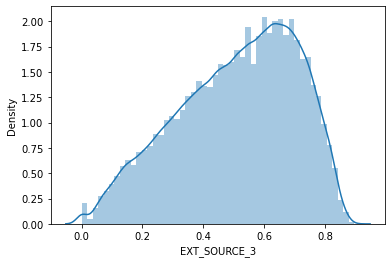

In [57]:
sns.distplot(df_without_COMMONAREA_MEDI['EXT_SOURCE_3'])
plt.show()

## Using KNN Imputer on the above two features

In [58]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)

In [68]:
imputed = imputer.fit_transform(df_without_COMMONAREA_MEDI_1[['OCCUPATION_TYPE_ENCODED','EXT_SOURCE_3']])

df_imputed = pd.DataFrame(imputed, columns=['OCCUPATION_TYPE_ENCODED','EXT_SOURCE_3'])

In [69]:
df_imputed['OCCUPATION_TYPE_ENCODED'].value_counts()

0.000000    51513
1.000000    32362
2.000000    28929
0.666667    10913
1.333333     8222
0.333333     8194
1.666667     2926
0.807946     2864
Name: OCCUPATION_TYPE_ENCODED, dtype: int64

In [72]:
# we can see new classes created and few new rows added to existing classes

In [70]:
df_imputed['EXT_SOURCE_3'].skew()

-0.40972617808677186

<AxesSubplot:xlabel='EXT_SOURCE_3', ylabel='Density'>

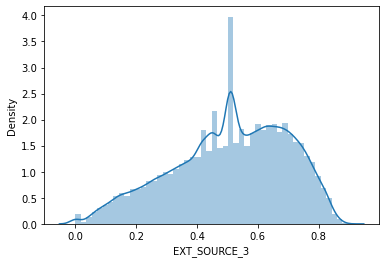

In [71]:
sns.distplot(df_imputed['EXT_SOURCE_3'])

***WE can clearly see the good result of KNN imputer.***

### Implementing this solution to our main dataset

In [60]:
df_without_COMMONAREA_MEDI[['OCCUPATION_TYPE_ENCODED','EXT_SOURCE_3']] = imputer.fit_transform(df_without_COMMONAREA_MEDI[['OCCUPATION_TYPE_ENCODED','EXT_SOURCE_3']])


In [61]:
df_without_COMMONAREA_MEDI['OCCUPATION_TYPE_ENCODED'].value_counts()

0.000000    75381
1.000000    46876
2.000000    41507
0.799915    13413
0.666667    12859
0.333333    10052
1.333333     9543
1.666667     3239
Name: OCCUPATION_TYPE_ENCODED, dtype: int64

In [75]:
df_without_COMMONAREA_MEDI['OCCUPATION_TYPE_ENCODED'].value_counts()

0.000000    51513
1.000000    32362
2.000000    28929
0.666667    10913
1.333333     8222
0.333333     8194
1.666667     2926
0.807946     2864
Name: OCCUPATION_TYPE_ENCODED, dtype: int64

In [76]:
#let's simplify these classes

In [62]:
def simplify_occupation(df):
    if df['OCCUPATION_TYPE_ENCODED']<1:
        return 0
    elif df['OCCUPATION_TYPE_ENCODED']>=1 and df['OCCUPATION_TYPE_ENCODED']<1.5:
        return 1
    else:
        return 2

In [63]:
df_without_COMMONAREA_MEDI['OCCUPATION_TYPE_ENCODED'] = df_without_COMMONAREA_MEDI.apply(simplify_occupation,axis=1)

In [64]:
df_without_COMMONAREA_MEDI['OCCUPATION_TYPE_ENCODED'].value_counts()

0    111705
1     56419
2     44746
Name: OCCUPATION_TYPE_ENCODED, dtype: int64

## now checking impmact on OCCUPATION_TYPE 

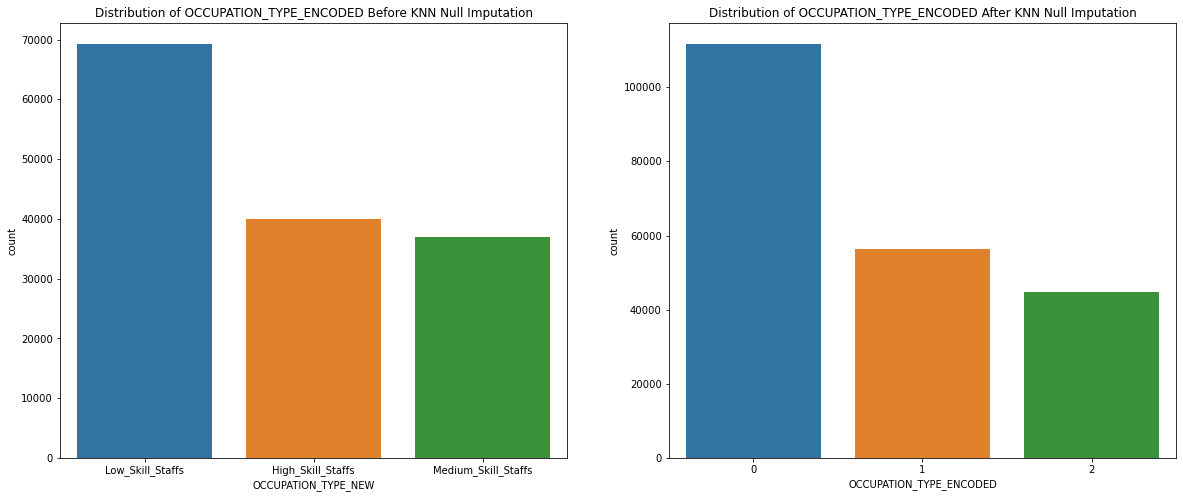

In [66]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.countplot(df_without_COMMONAREA_MEDI['OCCUPATION_TYPE_NEW'])
plt.title("Distribution of OCCUPATION_TYPE_ENCODED Before KNN Null Imputation")

plt.subplot(1,2,2)
sns.countplot(df_without_COMMONAREA_MEDI['OCCUPATION_TYPE_ENCODED'])
plt.title("Distribution of OCCUPATION_TYPE_ENCODED After KNN Null Imputation")

plt.show()


**We have managed to retain the distribution of classes with KNN imputer**

## now checking impmact on EXT_SOURCE_3 feature

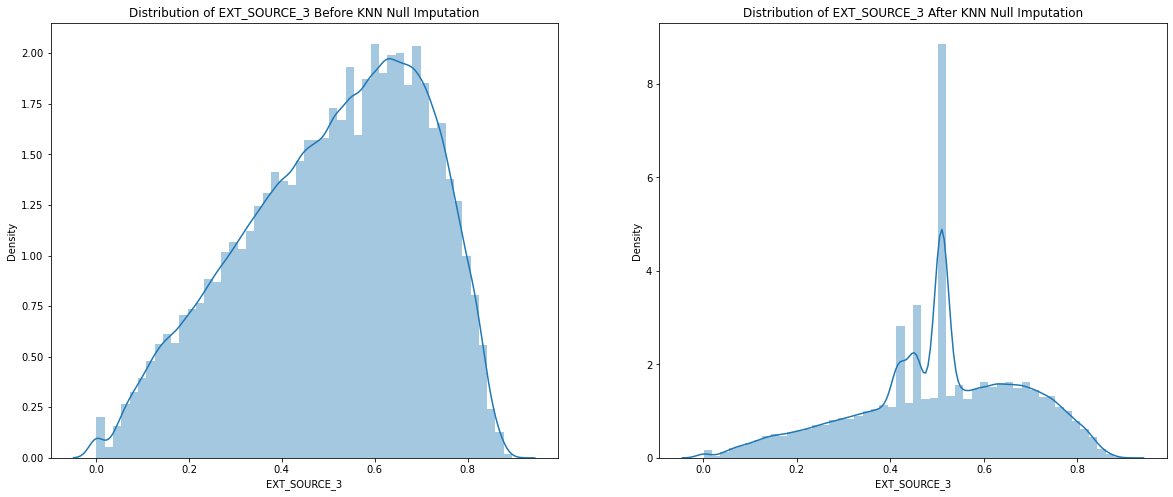

In [67]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.distplot(df['EXT_SOURCE_3'])
plt.title("Distribution of EXT_SOURCE_3 Before KNN Null Imputation")

plt.subplot(1,2,2)
sns.distplot(df_without_COMMONAREA_MEDI['EXT_SOURCE_3'])
plt.title("Distribution of EXT_SOURCE_3 After KNN Null Imputation")

plt.show()


**We have definetly managed to regain the shape of distribution of EXT_SOURCE_3 using KNN imputer with just a long peak in middle.**

### Finally checking the null values

In [68]:
final_null_count =  missing_values_table(df_without_COMMONAREA_MEDI)

final_null_count.head()

Total    Percent
OCCUPATION_TYPE            66572  31.273547
OCCUPATION_TYPE_NEW        66572  31.273547
TARGET                         0   0.000000
PERCENT_AVAILED_INSURANCE      0   0.000000
AVG_AMT_ANNUITY                0   0.000000

In [69]:
# we can drop the above columsn which were for backup.

df_applicaton_cleaned_1 = df_without_COMMONAREA_MEDI.drop(['OCCUPATION_TYPE_NEW','OCCUPATION_TYPE'],axis=1)

In [70]:
final_null_count =  missing_values_table(df_applicaton_cleaned_1)

final_null_count.head()

Total  Percent
TARGET                          0      0.0
AMT_REQ_CREDIT_BUREAU_HOUR      0      0.0
prev_Cash_loans                 0      0.0
STD_CNT_PAYMENT                 0      0.0
AVG_CNT_PAYMENT                 0      0.0

***No NULLS left***

## Final shape of dataset 1:

In [71]:
df_applicaton_cleaned_1.shape

(212870, 129)

In [72]:
#Saving the cleaned data in new CSV file

df_applicaton_cleaned_1.to_csv('application_data_cleaned_1.csv')

<a id="clean2"></a>
## [3.1.2 Working on df_with_COMMONAREA_MEDI dataset and saving result in applicaton_cleaned_2 file](#null)

In [73]:
#shape after dropping null value

df_with_COMMONAREA_MEDI.shape

(92646, 178)

In [74]:
#checking target class in new dataset

df_with_COMMONAREA_MEDI['TARGET'].value_counts(normalize=True) 

0    0.930898
1    0.069102
Name: TARGET, dtype: float64

In [75]:
#checking target class in original dataset

application_data_new['TARGET'].value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

**Observation**: class imbalance is slightly impacted in this case

In [76]:
#checking nulls > 50

null = missing_values_table(df_with_COMMONAREA_MEDI)

null[null['Percent']>50].shape

(2, 2)

In [77]:
null[null['Percent']>50].head()

Total    Percent
OWN_CAR_AGE   62145  67.077909
EXT_SOURCE_1  49518  53.448611

In [78]:
#let's drop these columns straigh away


columns_to_drop = null[null['Percent']>50].index

columns_to_drop

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1'], dtype='object')

In [79]:
df_with_COMMONAREA_MEDI_2 = df_with_COMMONAREA_MEDI.drop(columns_to_drop, axis=1)

df_with_COMMONAREA_MEDI_2.shape

(92646, 176)

***we have successfully dropped 2 features with more than 50% null values***

In [80]:
# now checking null values more than 0%

null = missing_values_table(df_with_COMMONAREA_MEDI_2)

null[null['Percent']>10].head(25)

Total    Percent
OCCUPATION_TYPE             29194  31.511344
EXT_SOURCE_3                17569  18.963582
AMT_REQ_CREDIT_BUREAU_YEAR  11560  12.477603
AMT_REQ_CREDIT_BUREAU_MON   11560  12.477603
AMT_REQ_CREDIT_BUREAU_WEEK  11560  12.477603
AMT_REQ_CREDIT_BUREAU_QRT   11560  12.477603
AMT_REQ_CREDIT_BUREAU_HOUR  11560  12.477603
AMT_REQ_CREDIT_BUREAU_DAY   11560  12.477603

Let's fill these features with 0 as we did earlier with dataset 1:

- AMT_REQ_CREDIT_BUREAU_QRT	
- AMT_REQ_CREDIT_BUREAU_MON	
- AMT_REQ_CREDIT_BUREAU_WEEK
- AMT_REQ_CREDIT_BUREAU_YEAR
- AMT_REQ_CREDIT_BUREAU_DAY
- AMT_REQ_CREDIT_BUREAU_HOUR

In [83]:
columns_to_impute = ['AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                     'AMT_REQ_CREDIT_BUREAU_YEAR',
                     'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR']
columns_to_impute

['AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_HOUR']

In [84]:
df_with_COMMONAREA_MEDI_2[columns_to_impute] = df_with_COMMONAREA_MEDI_2[columns_to_impute].fillna(0) 

In [85]:
# now checking null values more than 10%

null = missing_values_table(df_with_COMMONAREA_MEDI_2)

null[null['Percent']>10]

Total    Percent
OCCUPATION_TYPE  29194  31.511344
EXT_SOURCE_3     17569  18.963582

In [86]:
# we'll handle these later

In [87]:
# now checking null values less than 10%

null = missing_values_table(df_with_COMMONAREA_MEDI_2)

null[(null['Percent']>0) &(null['Percent']<10)]

Total   Percent
FONDKAPREMONT_MODE             4970  5.364506
LANDAREA_MEDI                  4333  4.676942
LANDAREA_MODE                  4333  4.676942
LANDAREA_AVG                   4333  4.676942
NONLIVINGAPARTMENTS_MODE       4139  4.467543
NONLIVINGAPARTMENTS_AVG        4139  4.467543
NONLIVINGAPARTMENTS_MEDI       4139  4.467543
FLOORSMIN_MODE                 2811  3.034130
FLOORSMIN_MEDI                 2811  3.034130
FLOORSMIN_AVG                  2811  3.034130
LIVINGAPARTMENTS_MEDI          2403  2.593744
LIVINGAPARTMENTS_MODE          2403  2.593744
LIVINGAPARTMENTS_AVG           2403  2.593744
BASEMENTAREA_MEDI              2300  2.482568
BASEMENTAREA_MODE              2300  2.482568
BASEMENTAREA_AVG               2300  2.482568
YEARS_BUILD_MEDI               1235  1.333031
YEARS_BUILD_MODE               1235  1.333031
YEARS_BUILD_AVG                1235  1.333031
NONLIVINGAREA_MEDI              920  0.993027
NONLIVINGAREA_MODE              920  0.993027
NONLIVINGAREA_AVG               920  0.993027
ELEVATORS_MEDI                  621  0.670293
ELEVATORS_MODE                  621  0.670293
ELEVATORS_AVG                   621  0.670293
WALLSMATERIAL_MODE              550  0.593658
APARTMENTS_MEDI                 478  0.515942
APARTMENTS_MODE                 478  0.515942
APARTMENTS_AVG                  478  0.515942
NAME_TYPE_SUITE                 416  0.449021
OBS_30_CNT_SOCIAL_CIRCLE        391  0.422037
DEF_30_CNT_SOCIAL_CIRCLE        391  0.422037
OBS_60_CNT_SOCIAL_CIRCLE        391  0.422037
DEF_60_CNT_SOCIAL_CIRCLE        391  0.422037
HOUSETYPE_MODE                  204  0.220193
EXT_SOURCE_2                    177  0.191050
YEARS_BEGINEXPLUATATION_MEDI     86  0.092826
YEARS_BEGINEXPLUATATION_AVG      86  0.092826
YEARS_BEGINEXPLUATATION_MODE     86  0.092826
FLOORSMAX_MODE                   76  0.082033
LIVINGAREA_AVG                   76  0.082033
LIVINGAREA_MEDI                  76  0.082033
FLOORSMAX_MEDI                   76  0.082033
FLOORSMAX_AVG                    76  0.082033
LIVINGAREA_MODE                  76  0.082033
ENTRANCES_AVG                    71  0.076636
ENTRANCES_MEDI                   71  0.076636
ENTRANCES_MODE                   71  0.076636
AMT_GOODS_PRICE                  64  0.069080
TOTALAREA_MODE                   17  0.018349
AMT_ANNUITY                       3  0.003238
CNT_FAM_MEMBERS                   1  0.001079

In [88]:
#let's fill these nulls with zeros 10% null values

columns_to_fill = null[(null['Percent']>0) &(null['Percent']<10)].index

In [89]:
columns_to_fill

Index(['FONDKAPREMONT_MODE', 'LANDAREA_MEDI', 'LANDAREA_MODE', 'LANDAREA_AVG',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAPARTMENTS_MEDI', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI',
       'FLOORSMIN_AVG', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAPARTMENTS_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_MODE',
       'BASEMENTAREA_AVG', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE',
       'YEARS_BUILD_AVG', 'NONLIVINGAREA_MEDI', 'NONLIVINGAREA_MODE',
       'NONLIVINGAREA_AVG', 'ELEVATORS_MEDI', 'ELEVATORS_MODE',
       'ELEVATORS_AVG', 'WALLSMATERIAL_MODE', 'APARTMENTS_MEDI',
       'APARTMENTS_MODE', 'APARTMENTS_AVG', 'NAME_TYPE_SUITE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'HOUSETYPE_MODE', 'EXT_SOURCE_2', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MODE',
       'FLOORSMAX_MODE', 'LIVINGAREA_AVG', 

In [90]:
df_with_COMMONAREA_MEDI_2[columns_to_fill] = df_with_COMMONAREA_MEDI_2[columns_to_fill].fillna(0)

In [91]:
df_with_COMMONAREA_MEDI_2.shape

(92646, 176)

In [92]:
# now checking null values more than 0%

null = missing_values_table(df_with_COMMONAREA_MEDI_2)

null[null['Percent']>0].shape

(2, 2)

In [93]:
# now checking null values more than 0%

null = missing_values_table(df_with_COMMONAREA_MEDI_2)

null[null['Percent']>0]

Total    Percent
OCCUPATION_TYPE  29194  31.511344
EXT_SOURCE_3     17569  18.963582

### we're left with just two column which needs to be imputed/handled, since they seem to be important features. 

### Let's take OCCUPATION_TYPE first.

In [94]:
df_with_COMMONAREA_MEDI_2['OCCUPATION_TYPE'].value_counts()

Laborers                 16023
Sales staff               9289
Core staff                8434
Managers                  7400
Drivers                   5019
High skill tech staff     4023
Accountants               3432
Medicine staff            2375
Security staff            1709
Cooking staff             1481
Cleaning staff            1439
Private service staff      898
Secretaries                477
Low-skill Laborers         424
Waiters/barmen staff       351
Realty agents              258
IT staff                   211
HR staff                   209
Name: OCCUPATION_TYPE, dtype: int64

In [95]:
# let's reduce/simplify the classes first

def occupation_type(df):
    if df['OCCUPATION_TYPE'] in ['Security staff','Waiters/barmen staff','Cooking staff','Cleaning staff','Private service staff',
                                'Low-skill Laborers', 'Laborers','Drivers']:
        return 'Low_Skill_Staffs'
    elif df['OCCUPATION_TYPE'] in ['Managers', 'High skill tech staff','Core staff']:
        return 'High_Skill_Staffs'
    elif df['OCCUPATION_TYPE'] in ['Accountants', 'Sales staff','Core staff','Medicine staff','Realty agents',
                                  'Secretaries','IT staff','HR staff']:
        return 'Medium_Skill_Staffs'
    

In [96]:
#applyiing the above function and creating a new simplified feature for OCCUPATION

df_with_COMMONAREA_MEDI_2['OCCUPATION_TYPE_NEW'] = df_with_COMMONAREA_MEDI_2.apply(occupation_type,axis=1)

df_with_COMMONAREA_MEDI_2['OCCUPATION_TYPE_NEW'].value_counts()

Low_Skill_Staffs       27344
High_Skill_Staffs      19857
Medium_Skill_Staffs    16251
Name: OCCUPATION_TYPE_NEW, dtype: int64

**we can see much simplified classes for occupation**

### Ordinal Encoding Occupation classes first

In [97]:
df_with_COMMONAREA_MEDI_2['OCCUPATION_TYPE_ENCODED'] = df_with_COMMONAREA_MEDI_2['OCCUPATION_TYPE_NEW'].map({'Low_Skill_Staffs':0, 
                                                                                            'Medium_Skill_Staffs':1,
                                                                                           'High_Skill_Staffs': 2})

df_with_COMMONAREA_MEDI_2['OCCUPATION_TYPE_ENCODED'].value_counts()

0.0    27344
2.0    19857
1.0    16251
Name: OCCUPATION_TYPE_ENCODED, dtype: int64

**Successfully creatd ordinal variables**

### Analysing EXT_SOURCE_3:

In [98]:
df_with_COMMONAREA_MEDI_2['EXT_SOURCE_3'].skew()

-0.4113287529091463

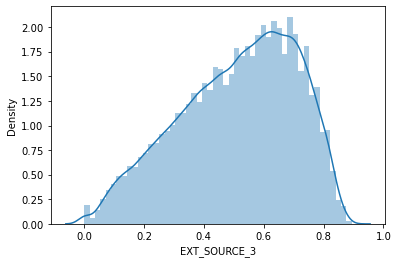

In [99]:
sns.distplot(df_with_COMMONAREA_MEDI_2['EXT_SOURCE_3'])
plt.show()

## Using KNN Imputer on the above two features

In [100]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)

***WE have already seen good result of KNN imputer in datasset 1.***

### Implementing this solution to our main dataset

In [101]:
df_with_COMMONAREA_MEDI_2[['OCCUPATION_TYPE_ENCODED_Imputed','EXT_SOURCE_3']] = imputer.fit_transform(df_with_COMMONAREA_MEDI_2[['OCCUPATION_TYPE_ENCODED','EXT_SOURCE_3']])

In [102]:
df_with_COMMONAREA_MEDI_2['OCCUPATION_TYPE_ENCODED_Imputed'].value_counts()

0.000000    29467
2.000000    20572
1.000000    20377
0.666667     6328
0.882005     5553
1.333333     4632
0.333333     3786
1.666667     1931
Name: OCCUPATION_TYPE_ENCODED_Imputed, dtype: int64

In [104]:
#let's simplify these classes

def simplify_occupation(df):
    if df['OCCUPATION_TYPE_ENCODED_Imputed']<1:
        return 0
    elif df['OCCUPATION_TYPE_ENCODED_Imputed']>=1 and df['OCCUPATION_TYPE_ENCODED_Imputed']<1.5:
        return 1
    else:
        return 2

In [105]:
df_with_COMMONAREA_MEDI_2['OCCUPATION_TYPE_ENCODED_Imputed'] = df_with_COMMONAREA_MEDI_2.apply(simplify_occupation,axis=1)

df_with_COMMONAREA_MEDI_2['OCCUPATION_TYPE_ENCODED_Imputed'].value_counts()

0    45134
1    25009
2    22503
Name: OCCUPATION_TYPE_ENCODED_Imputed, dtype: int64

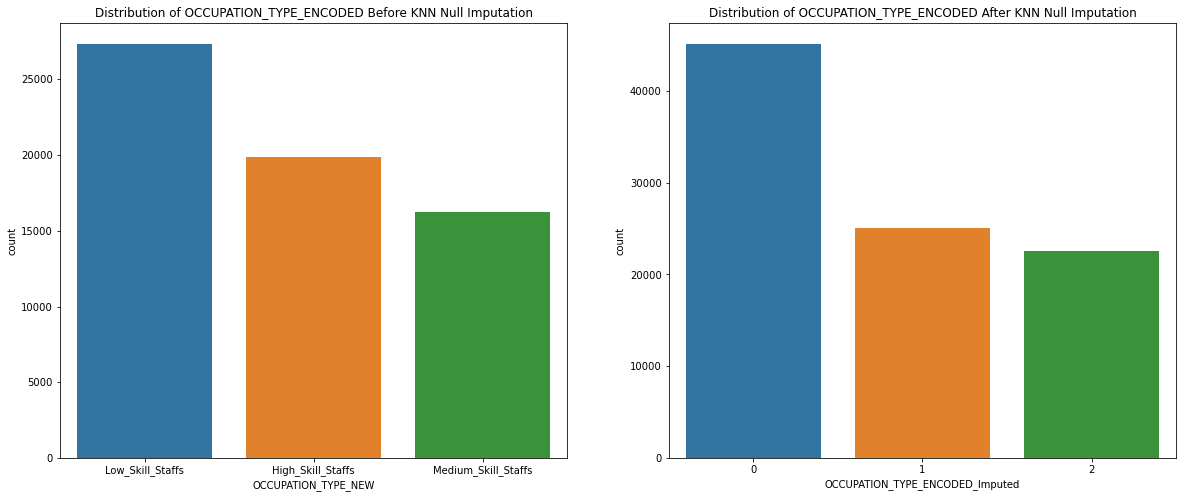

In [106]:
## now checking impmact on OCCUPATION_TYPE 

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.countplot(df_with_COMMONAREA_MEDI_2['OCCUPATION_TYPE_NEW'])
plt.title("Distribution of OCCUPATION_TYPE_ENCODED Before KNN Null Imputation")

plt.subplot(1,2,2)
sns.countplot(df_with_COMMONAREA_MEDI_2['OCCUPATION_TYPE_ENCODED_Imputed'])
plt.title("Distribution of OCCUPATION_TYPE_ENCODED After KNN Null Imputation")

plt.show()

**We have managed to retain the distribution of classes with KNN imputer**

## now checking impmact on EXT_SOURCE_3 feature

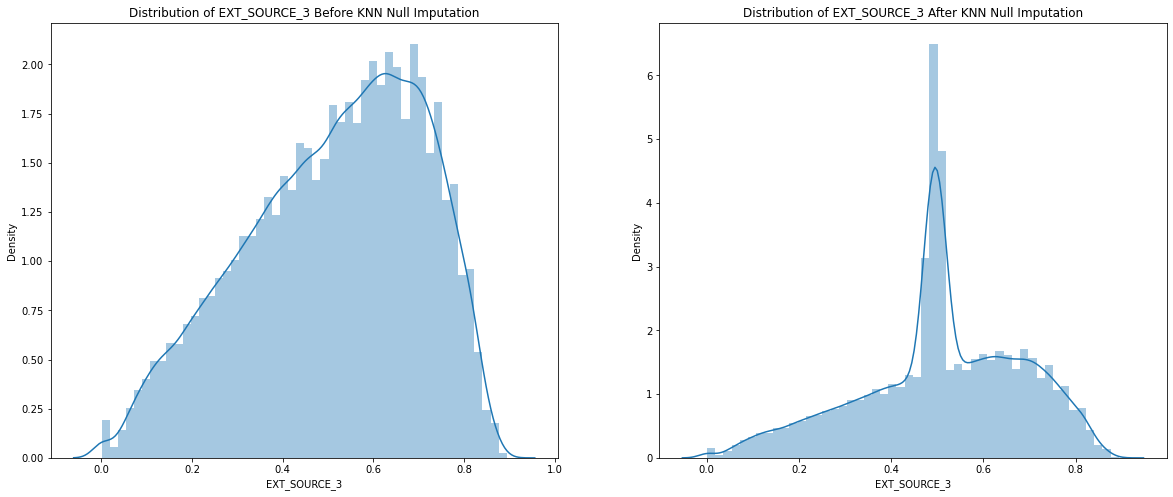

In [107]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.distplot(df_with_COMMONAREA_MEDI['EXT_SOURCE_3'])
plt.title("Distribution of EXT_SOURCE_3 Before KNN Null Imputation")

plt.subplot(1,2,2)
sns.distplot(df_with_COMMONAREA_MEDI_2['EXT_SOURCE_3'])
plt.title("Distribution of EXT_SOURCE_3 After KNN Null Imputation")

plt.show()

**We have managed to regain the shape of distribution of EXT_SOURCE_3 using KNN imputer with just a long peak in middle.**

### Finally checking the null values

In [108]:
final_null_count =  missing_values_table(df_with_COMMONAREA_MEDI_2)

final_null_count.head()

Total    Percent
OCCUPATION_TYPE_ENCODED  29194  31.511344
OCCUPATION_TYPE_NEW      29194  31.511344
OCCUPATION_TYPE          29194  31.511344
TARGET                       0   0.000000
TOTAL_CUSTOMER_CREDIT        0   0.000000

In [109]:
# we can drop the above columsn which were for backup.

df_application_cleaned_2 = df_with_COMMONAREA_MEDI_2.drop(['OCCUPATION_TYPE_NEW','OCCUPATION_TYPE','OCCUPATION_TYPE_ENCODED'],axis=1)

In [110]:
final_null_count =  missing_values_table(df_application_cleaned_2)

final_null_count.head()

Total  Percent
TARGET                          0      0.0
NAME_CONTRACT_TYPE              0      0.0
AMT_REQ_CREDIT_BUREAU_HOUR      0      0.0
AMT_REQ_CREDIT_BUREAU_DAY       0      0.0
AMT_REQ_CREDIT_BUREAU_WEEK      0      0.0

***No NULLS left***

## Final shape of dataset 2:

In [111]:
df_application_cleaned_2.shape

(92646, 176)

In [112]:
#Saving the cleaned data in new CSV file

df_application_cleaned_2.to_csv('application_data_cleaned_2.csv')

## Final shape of Cleaed dataset 1 & 2:

In [113]:
df_applicaton_cleaned_1.shape , df_application_cleaned_2.shape

((212870, 129), (92646, 176))

# Missing value Treatment Done

##############################################################################################################################

<a id="count"></a>
## [4. Variable categorization (count of numeric and categorical)](#home)

<a id="count"></a>
## [4. Premetive Feature Elimination using Variance, ViF and Statistical methods](#home)

If the variance is low or close to zero, then a feature is approximately constant and will not improve the performance of the model. In that case, it should be removed.

<a id="target"></a>
## [4. Understanding our Target Variable](#home)

0    91.93
1     8.07
Name: TARGET, dtype: float64


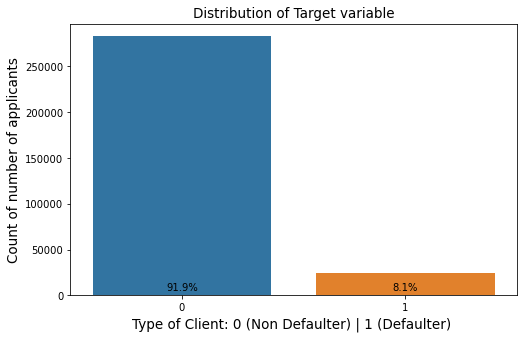

In [205]:
plt.figure(figsize=(8,5))

print(round(application_data_new['TARGET'].value_counts(normalize=True),4)*100)
ax = sns.countplot(application_data_new['TARGET'])
height = list(round(application_data_new['TARGET'].value_counts(normalize=True),4)*100)

for p,h in zip(ax.patches, height):
    ax.annotate('{:.1f}%'.format(h),
      xy=(p.get_x() + p.get_width() / 2,h),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
    
    
plt.title('Distribution of Target variable', fontsize = 13.5)
plt.ylabel('Count of number of applicants', fontsize = 13.5)
plt.xlabel('Type of Client: 0 (Non Defaulter) | 1 (Defaulter) ', fontsize = 13.5)

plt.show()

**Our Data is cleary Imbalanced!**

**With 91.9% of Non Defaulters and 8.1% of Defaulters**

## Distrubution of Target After null value handling and data pre processing

0    93.12
1     6.88
Name: TARGET, dtype: float64


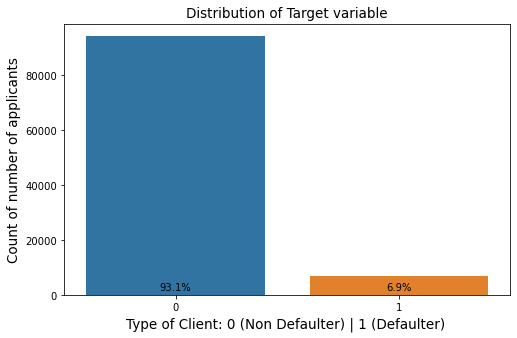

In [355]:
plt.figure(figsize=(8,5))

print(round(application_new_cleaned_copy['TARGET'].value_counts(normalize=True),4)*100)
ax = sns.countplot(application_new_cleaned_copy['TARGET'])
height = list(round(application_new_cleaned_copy['TARGET'].value_counts(normalize=True),4)*100)

for p,h in zip(ax.patches, height):
    ax.annotate('{:.1f}%'.format(h),
      xy=(p.get_x() + p.get_width() / 2,h),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
    
    
plt.title('Distribution of Target variable', fontsize = 13.5)
plt.ylabel('Count of number of applicants', fontsize = 13.5)
plt.xlabel('Type of Client: 0 (Non Defaulter) | 1 (Defaulter) ', fontsize = 13.5)

plt.show()

**Our Data has become more Imbalanced!**

**With 93.1% of Non Defaulters and 6.9% of Defaulters**

# Let's catch up in the following notebook for EDA part

## Meanwhile, a glimpse of EDA can be found below

###############################################################################################################################

<a id="eda"></a>
# [ Data Exploration and Analysis](#home)

In this section we will start further exploring our dataset in three parts. 

First we will start exploring our numerical variables and then we will move to our categorical entities.

Moving ahead, we will further jump to Bi-variate analysis to look for relationship among the variables and our target

<a id="num"></a>
## 3.1. Numerical Variables Analysis

### 3.1.1. Distribution of AMT_CREDIT

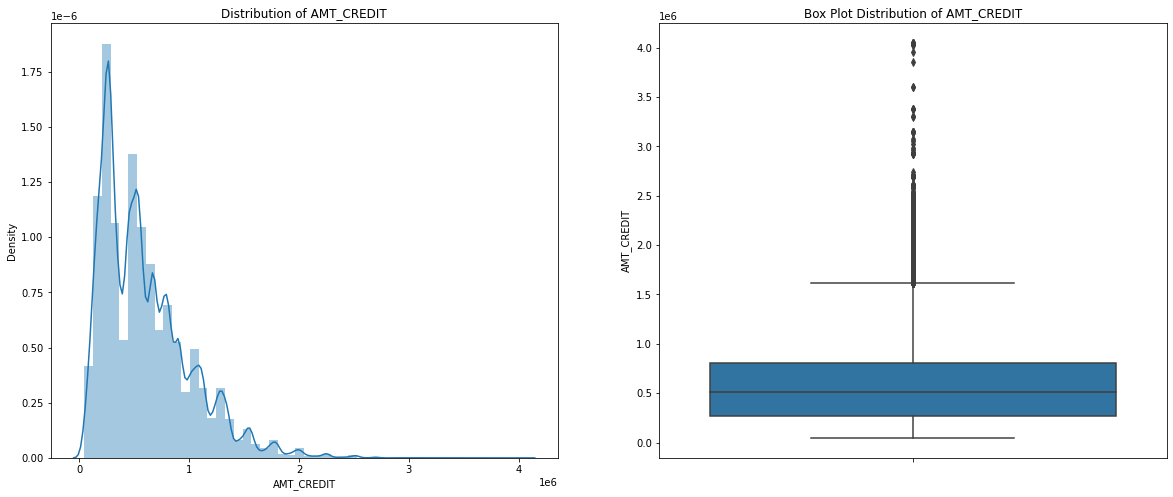

In [5]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title("Distribution of AMT_CREDIT")
sns.distplot(application_data["AMT_CREDIT"])
plt.subplot(1,2,2)
plt.title("Box Plot Distribution of AMT_CREDIT")
ax = sns.boxplot(y=application_data["AMT_CREDIT"])

In [69]:
print('Skewness of AMT_CREDIT: ',application_data["AMT_CREDIT"].skew())

Skewness of AMT_CREDIT:  1.2347784971349398


**Observation**: 
- We can see there are lot of outliers present in our AMT_CREDIT column 
- And it is highly positively skewed as well.

### 3.1.2. Distribution of AMT_INCOME_TOTAL

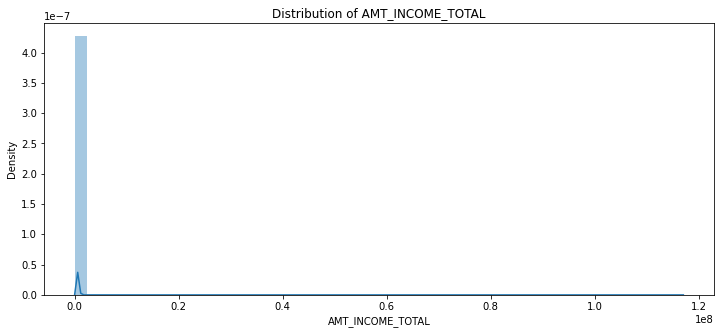

In [202]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_INCOME_TOTAL")
ax = sns.distplot(df_applicaton_cleaned_1["AMT_INCOME_TOTAL"])

In [203]:
df_applicaton_cleaned_1["AMT_INCOME_TOTAL"].var()

75792642188.57243

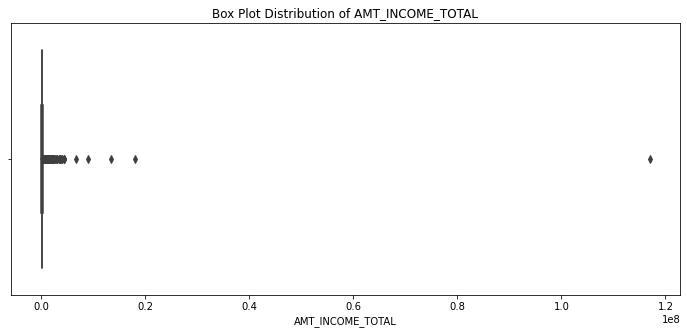

In [70]:
plt.figure(figsize=(12,5))
plt.title("Box Plot Distribution of AMT_INCOME_TOTAL")
ax = sns.boxplot(application_data["AMT_INCOME_TOTAL"])

In [39]:
print('Skewness of AMT_INCOME_TOTAL: ',application_data["AMT_INCOME_TOTAL"].skew())

Skewness of AMT_INCOME_TOTAL:  391.5596541041876


**Observation**: We can see there are lot of outliers present in our AMT_INCOME_TOTAL column and it is **heavily positively skewed** as well.

### 3.1.3. Distribution of AMT_GOODS_PRICE

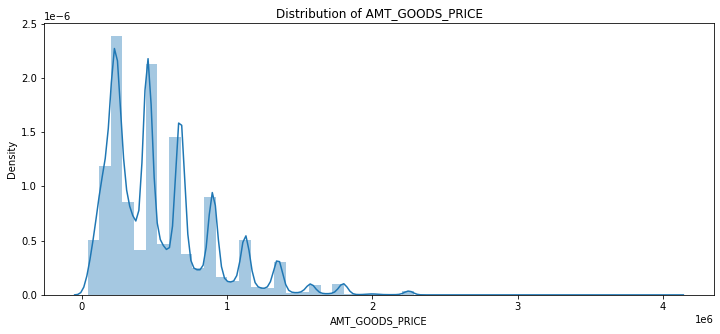

In [42]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_GOODS_PRICE")
ax = sns.distplot(application_data["AMT_GOODS_PRICE"].dropna())

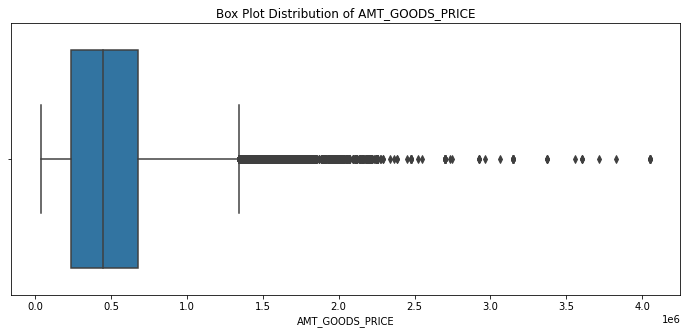

In [72]:
plt.figure(figsize=(12,5))
plt.title("Box Plot Distribution of AMT_GOODS_PRICE")
ax = sns.boxplot(application_data["AMT_GOODS_PRICE"])

In [73]:
print('Skewness of AMT_GOODS_PRICE: ',application_data["AMT_GOODS_PRICE"].skew())

Skewness of AMT_GOODS_PRICE:  1.3490003414747445


**Observation**: We can see there are lot of outliers present in our AMT_GOODS_PRICE column and it is positively skewed as well. ALso, it seems to have multiple modes in the dataset.

### 3.1.4. Distribution of AGE

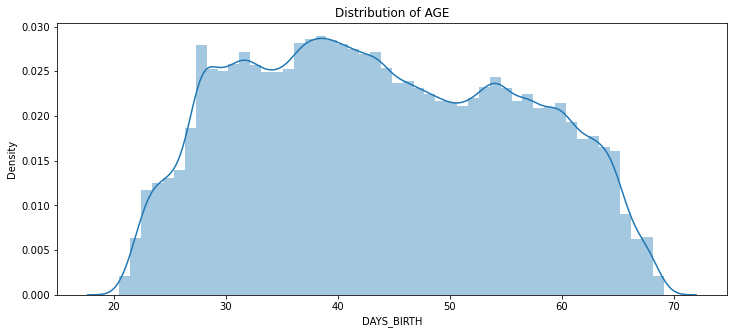

In [95]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AGE")
#Dividing number of days since born by 365 to achieve age of applicants
ax = sns.distplot(-1*(application_data["DAYS_BIRTH"].dropna())/365)  

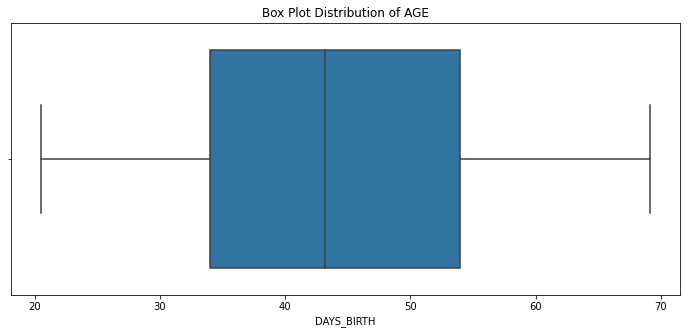

In [76]:
plt.figure(figsize=(12,5))
plt.title("Box Plot Distribution of AGE")
ax = sns.boxplot(-1*(application_data["DAYS_BIRTH"].dropna())/365)

In [79]:
print('Skewness of AGE: ',application_data["DAYS_BIRTH"].skew())

Skewness of AGE:  -0.11567331170166129


**Observation**: We can see there are **no outliers** in our AGE column and it is slightly negatively skewed.

### 3.1.5. Distribution of WORK_EXPERIENCE

In [17]:
YEARS_EMPLOYED = application_data[application_data["DAYS_EMPLOYED"]<0]['DAYS_EMPLOYED']/-365
YEARS_EMPLOYED.head()

0    1.745205
1    3.254795
2    0.616438
3    8.326027
4    8.323288
Name: DAYS_EMPLOYED, dtype: float64

In [20]:
YEARS_EMPLOYED.shape

(252135,)

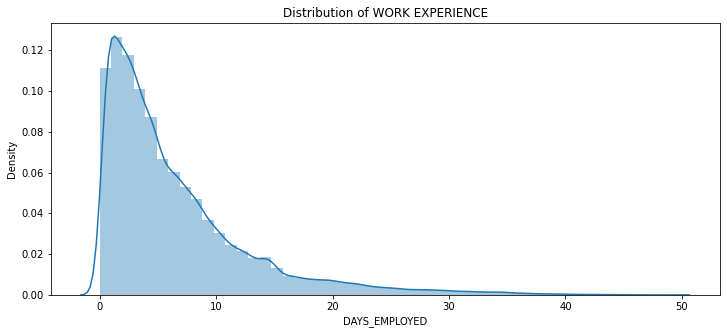

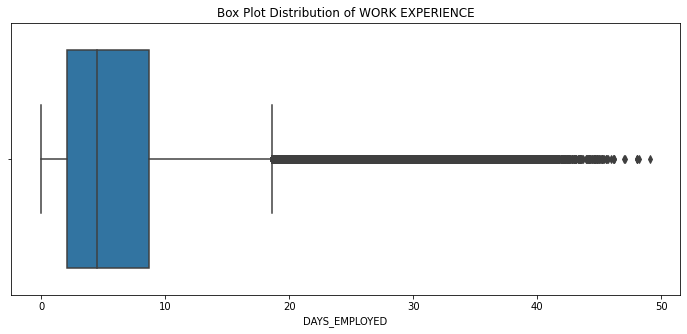

In [90]:
plt.figure(figsize=(12,5))
plt.title("Distribution of WORK EXPERIENCE")
#Dividing number of days since born by 365 to achieve age of applicants
ax1 = sns.distplot(YEARS_EMPLOYED)  
plt.show()

plt.figure(figsize=(12,5))
plt.title("Box Plot Distribution of WORK EXPERIENCE")
ax2 = sns.boxplot(YEARS_EMPLOYED)
plt.show()

In [91]:
print('Skewness of YEARS_EMPLOYED: ',YEARS_EMPLOYED.skew())

Skewness of YEARS_EMPLOYED:  1.9683162158202794


**Observation**: We can see there are **too many outliers** in our YEARS_EMPLOYED column and it is positively skewed.

<a id="cat"></a>
## 3.2. Categorical Variables Analysis

In [87]:
df_cat = application_data.select_dtypes(include=[np.object])
df_cat.head()

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY NAME_TYPE_SUITE  \
0         Cash loans           M            N               Y   Unaccompanied   
1         Cash loans           F            N               N          Family   
2    Revolving loans           M            Y               Y   Unaccompanied   
3         Cash loans           F            N               Y   Unaccompanied   
4         Cash loans           M            N               Y   Unaccompanied   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START  \
0  House / apartment        Laborers                  WEDNESDAY   
1  House / apartment      Core staff                     MONDAY   
2  House / apartment        Laborers                     MONDAY   
3  House / apartment        Laborers                  WEDNESDAY   
4  House / apartment      Core staff                   THURSDAY   

        ORGANIZATION_TYPE FONDKAPREMONT_MODE  HOUSETYPE_MODE  \
0  Business Entity Type 3   reg oper account  block of flats   
1                  School   reg oper account  block of flats   
2              Government                NaN             NaN   
3  Business Entity Type 3                NaN             NaN   
4                Religion                NaN             NaN   

  WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  
0       Stone, brick                  No  
1              Block                  No  
2                NaN                 NaN  
3                NaN                 NaN  
4                NaN                 NaN

In [92]:
#Function to plot categorical feature with target and different levels
def categorical_plot(data, feature_name):
    '''
    This function to plot categorical features
    i) distribution of feature
    ii) distribution of feature with target
    iii) probability of defaulters
    iv) probability of non defaulters
    '''
    plotdata_1 = data[data.TARGET == 1][feature_name].value_counts() / data[data.TARGET == 1][feature_name].shape[0]
    
    plotdata_0 = data[data.TARGET == 0][feature_name].value_counts() / data[data.TARGET == 0][feature_name].shape[0]

    fig, axes = plt.subplots(2, 2, figsize=(16,8))
    
    ax1 = sns.countplot(ax = axes[0][0],x=data[feature_name]).set_title(f"Distribution of {feature_name}")
    height1 = list(round(data[feature_name].value_counts(normalize=True),4)*100)
    for p,h in zip(ax.patches, height1):
        ax1.annotate('{:.1f}%'.format(h),
                    xy=(p.get_x() + p.get_width() / 2,h),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')
    
    ax2 = sns.countplot(ax = axes[0][1],x=data[feature_name], hue=data.TARGET, data=data).set_title(f"Distribution of {feature_name} by default/non-default")
    height2 = list(round(data[feature_name].value_counts(normalize=True),4)*100)
    for p,h in zip(ax.patches, height2):
        ax2.annotate('{:.1f}%'.format(h),
                    xy=(p.get_x() + p.get_width() / 2,h),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')
    
    ax3 = sns.barplot(ax = axes[1][0],x = plotdata_1.index, y=plotdata_1.values).set_title(f"Defaulter by {feature_name}")
    
    ax4 = sns.barplot(ax = axes[1][1],x = plotdata_0.index, y=plotdata_0.values).set_title(f"Non Defaulter by {feature_name}")
    
    for i in range(2):
        for j in range(2):
            axes[i][j].tick_params(axis='x',labelrotation=90)
    
    fig.tight_layout()
    plt.show()

### 3.2.1. Distribution of Loan types

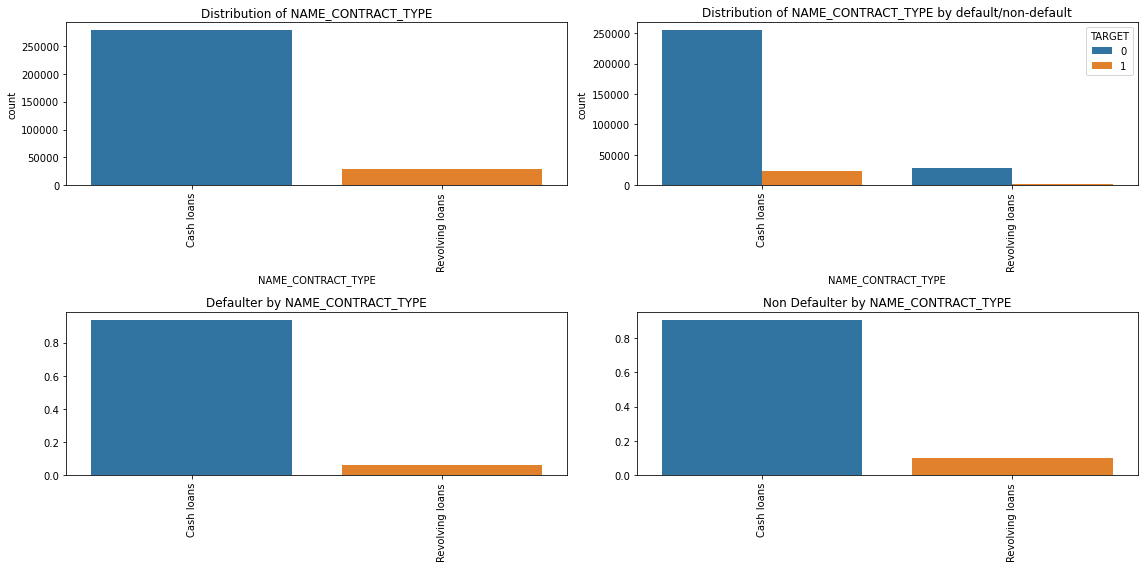

In [93]:
categorical_plot(application_data, feature_name='NAME_CONTRACT_TYPE')

In [9]:
pd.crosstab(application_data['TARGET'], application_data['NAME_CONTRACT_TYPE'])

NAME_CONTRACT_TYPE  Cash loans  Revolving loans
TARGET                                         
0                       255011            27675
1                        23221             1604

### 3.2.2. Distribution of Gender

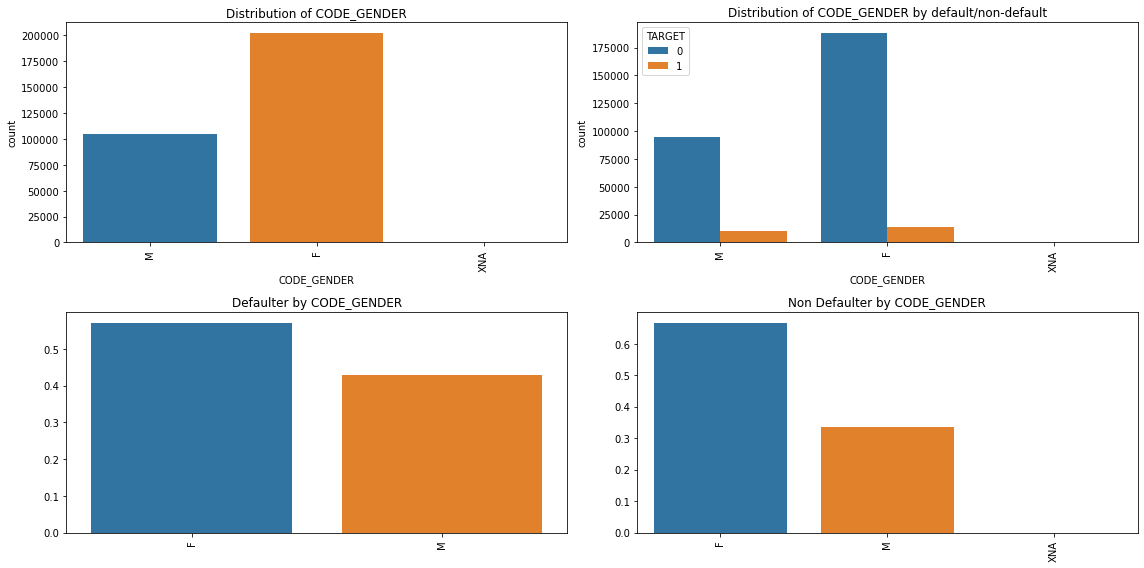

In [17]:
categorical_plot(application_data, feature_name='CODE_GENDER')

In [18]:
pd.crosstab(application_data['TARGET'], application_data['CODE_GENDER'])

CODE_GENDER       F      M  XNA
TARGET                         
0            188278  94404    4
1             14170  10655    0

### 3.2.3. Distribution of Car owners

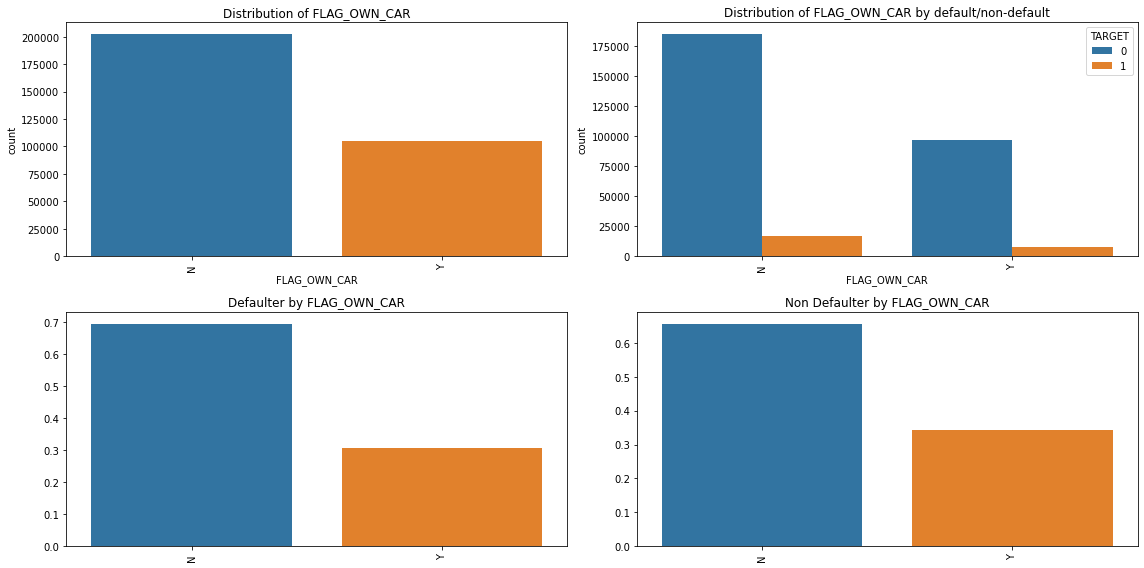

In [12]:
categorical_plot(application_data, feature_name='FLAG_OWN_CAR')

In [13]:
pd.crosstab(application_data['TARGET'], application_data['FLAG_OWN_CAR'])

FLAG_OWN_CAR       N      Y
TARGET                     
0             185675  97011
1              17249   7576

### 3.2.4. Distribution of Reality State owners

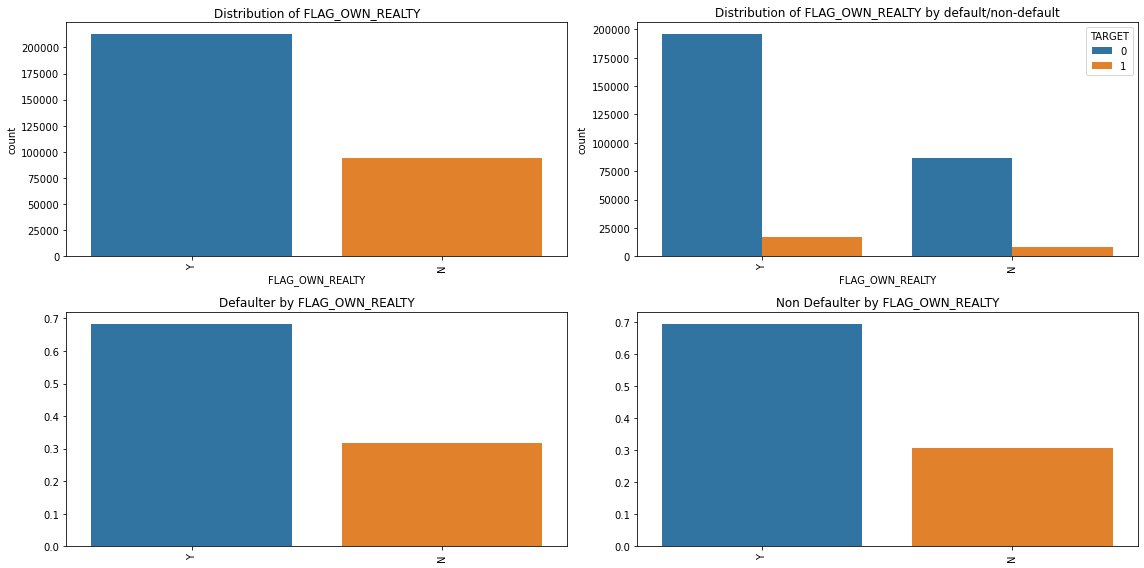

In [14]:
categorical_plot(application_data, feature_name='FLAG_OWN_REALTY')

In [15]:
pd.crosstab(application_data['TARGET'], application_data['FLAG_OWN_REALTY'])

FLAG_OWN_REALTY      N       Y
TARGET                        
0                86357  196329
1                 7842   16983

### 3.2.5. Distribution of type of companion accompanying the applicate while applying for loan

In [44]:
temp = application_data["NAME_TYPE_SUITE"].value_counts()
#print("Total number of states : ",len(temp))
trace = go.Bar(
    x = temp.index,
    y = (temp / temp.sum())*100,
)
data = [trace]
layout = go.Layout(
    title = "Who accompanied client when applying for the  application in % ",
    xaxis=dict(
        title='Name of type of the Suite',
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Count of Name of type of the Suite in %',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
)
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='schoolStateNames')

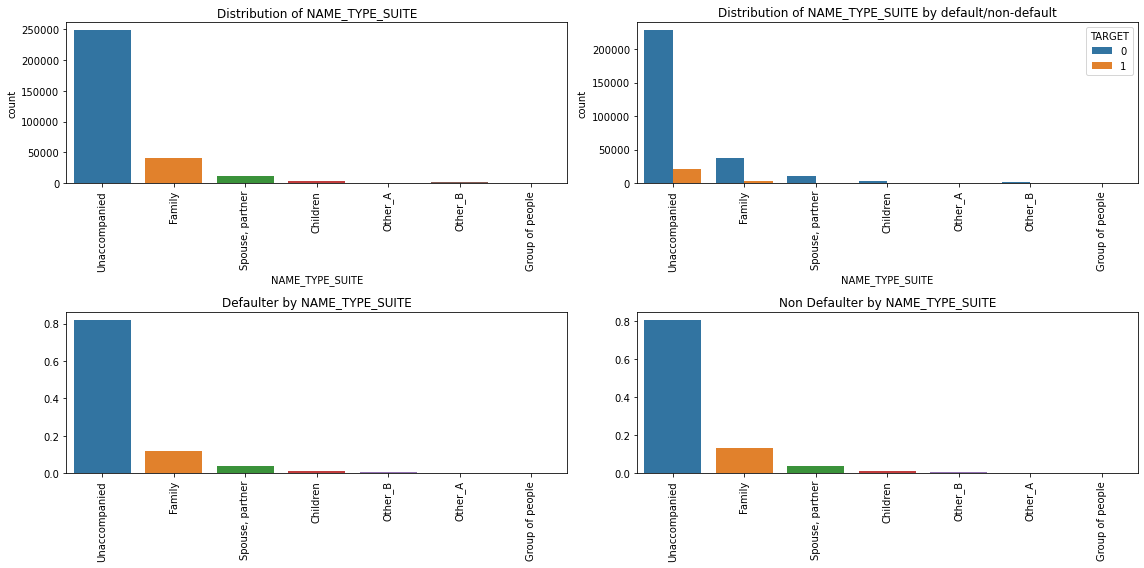

In [16]:
categorical_plot(application_data, feature_name='NAME_TYPE_SUITE')

In [17]:
pd.crosstab(application_data['TARGET'], application_data['NAME_TYPE_SUITE'])

NAME_TYPE_SUITE  Children  Family  Group of people  Other_A  Other_B  \
TARGET                                                                 
0                    3026   37140              248      790     1596   
1                     241    3009               23       76      174   

NAME_TYPE_SUITE  Spouse, partner  Unaccompanied  
TARGET                                           
0                          10475         228189  
1                            895          20337

#### We could clealy observe the uniformity in the distribution of categorical variable with the target variable.

In [ ]:
## Relationship Between Age and Defaulters

plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(df1.loc[df1['TARGET'] == 0, 'YEARS_BIRTH'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df1.loc[df1['TARGET'] == 1, 'YEARS_BIRTH'] , label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)') 
plt.ylabel('Density') 
plt.title('Distribution of Ages')
plt.show()

plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(df1.loc[df1['TARGET'] == 0, 'YEARS_EMPLOYED'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df1.loc[df1['TARGET'] == 1, 'YEARS_EMPLOYED'] , label = 'target == 1')

# Labeling of plot
plt.xlabel('Work Experience (years)') 
plt.ylabel('Density') 
plt.title('Distribution of Years worked')
plt.show()



